<h1 style="text-align:center;">LINEAR REGRESSION</h1>
<br>
<br>
<h4>Types of Linear Regression</h4>

   -  Simple linear regression
   -  Multiple linear regression
   -  Polynomial linear regression

<h3 style="text-align:center;"><u>SIMPLE LINEAR REGRESSION</u></h3>

Simple linear regression can be used to model a linear relationship between one response variable and one explanatory variable. Conisder the example below:-

**Problem concept.**
- Suppose you wish to know the price of pizza. You can simply look at menu. This, however, is a machine learning book,  we will use simple linear regression instead to predict the price of a pizza based on an attribute of the pizza that we can observe. 
- Let's model the relationship between the size of a pizza and its price.
- Assume that you have recorded the diameters and prices of pizza that you have previously eaten.

- Mathematically simple linear regression model is:
<h3 style="text-align:center;"> <i>y</i> = &alpha; + &beta;<i>x</i> </h3>
- <i>y</i> is the predicted value of the response variable; in this example, it is the predicted price of the pizza. <i>x</i> is the explanatory variable.The intercept term <span>&alpha;</span> and coeffient <span>&beta;</span> are parameters of the model that are learned by the learning algorithm.
- The parameters are also known as weight and bias (<i>w the gradient </i> and <i>b the intercept<i/>) in machine learning.
- Then our task is to write a program which learns the parameters <i>w</i> and <i>b</i>
<br> 
<br>
    
**Dataset**
<br>
<h6>Train set</h6>
<br>

**Training instance**      |    **Diameter (in inches)** | **Price(in dillars)**
---------------------------|-------------------------------|----------------------------
1.                         |            6                  |           7
2.                         |            8                  |           9
3.                         |            10                 |           13
4.                         |            14                 |           17.5
5.                         |            18                 |           18

<br>
<h6>Test set </h6>
<br>

**Training instance**      |    **Diameter (in inches)** | **Price(in dillars)**
---------------------------|-------------------------------|----------------------------
1.                         |            8                  |           11
2.                         |            9                  |           8.5
3.                         |            11                 |           15
4.                         |            16                 |           18
5.                         |            12                 |           11

<br>

<h3>Implementation concept</h3>

- Using training data to learn the values of the parameters for simple linear regression that produce the best fitting model is called **ordinary least squares** or **linear least squares** 

<h5>Plot the graph for the dataset : </h5>

In [1]:
import numpy as np
import matplotlib as mpl
from matplotlib import pyplot as plt

In [2]:
diameter = np.array([6,8,10,14,18])
price = np.array([7,9,13,17.5,18])

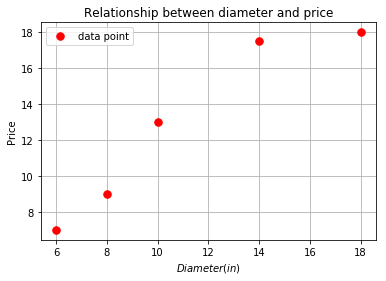

In [3]:
#plot
plt.plot(diameter,price,'r.',label="data point",markersize=15)
plt.title("Relationship between diameter and price")
plt.xlabel("$Diameter(in)$")
plt.ylabel("Price")
plt.grid(True)
plt.legend()
plt.show()

In [4]:
#initialize weight and bias to zero
w = 0
b = 0

In [5]:
#define a function to perform prediction
def predict(x):
    return (w*x + b)

In [6]:
# define a function to calculate error(loss)
from math import pow
def loss(x,y):
    return (pow((predict(x)-y),2))/2

In [7]:
#define a function to calculate gradient of Error wrt Weight
def gradient_weight(x,y):
    return x*(predict(x)-y)

In [8]:
#define a function to calculate the gradient of Error wrt bias
def gradient_bias(x,y):
    return (predict(x)-y)

In [9]:
#create list to store sum of loss, weight and bias
weight_list = []
bias_list = []
loss_list = []

In [10]:
#initialize the learning rate (step size)
lr = 0.001

In [11]:
#prediction before training the model
print("[8,9,11,16,12] diameter pizza costs : ",predict(np.array([8,9,11,16,12]))," dollars")

[8,9,11,16,12] diameter pizza costs :  [0 0 0 0 0]  dollars


In [12]:
#train the model to get the optimal values of Weight and bias
for epoch in np.arange(1,2001):
    print("Epoch number:  ",epoch)
    #initialize the sum of loss
    loss_sum = 0
    #for each epoch pass through all datapoints
    passes = 1
    for x,y in zip(diameter,price):
        print("Pass no : ",passes)
        #update weight
        w = w - lr*gradient_weight(x,y)
        #update bias
        b = b- lr*gradient_bias(x,y)
        #sum loss
        loss_sum += loss(x,y)
        #append the sum to the list
        loss_list.append(loss_sum)
        #append weight to the list
        weight_list.append(w)
        #append bias to the list
        bias_list.append(b)
        print("Weight gradient : ",gradient_weight(x,y))
        print("Bias gradient : ",gradient_bias(x,y))
        print("Weight : ",w)
        print("Bias : ", b)
        passes+=1 
    print("Mean loss : ", loss_sum/diameter.size,"\n");

Epoch number:   1
Pass no :  1
Weight gradient :  -40.447512
Bias gradient :  -6.741252
Weight :  0.042
Bias :  0.0067480000000000005
Pass no :  2
Weight gradient :  -64.760677473024
Bias gradient :  -8.095084684128
Weight :  0.11125801600000002
Bias :  0.014851187872
Pass no :  3
Weight gradient :  -106.74626475128285
Bias gradient :  -10.674626475128285
Weight :  0.22998370252128
Bias :  0.0255364996589152
Pass no :  4
Weight gradient :  -160.29035857234413
Bias gradient :  -11.44931132659601
Weight :  0.4295493858318843
Bias :  0.036997271757609904
Pass no :  5
Weight gradient :  -124.36770032229596
Bias gradient :  -6.909316684571998
Weight :  0.6137094339307168
Bias :  0.04391350467509939
Mean loss :  40.37479118552421 

Epoch number:   2
Pass no :  1
Weight gradient :  -18.916896261733804
Bias gradient :  -3.152816043622301
Weight :  0.6333524132811603
Bias :  0.04706947669073733
Pass no :  2
Weight gradient :  -29.070101592551786
Bias gradient :  -3.6337626990689733
Weight :  0.

Weight :  1.1403635291999659
Bias :  0.10823831244377148
Pass no :  5
Weight gradient :  32.02796537990384
Bias gradient :  1.7793314099946578
Weight :  1.092937456115189
Bias :  0.10645719992125431
Mean loss :  0.8343951423923693 

Epoch number:   18
Pass no :  1
Weight gradient :  -1.9410071285553094
Bias gradient :  -0.3235011880925516
Weight :  1.0949529644955147
Bias :  0.10678102493435997
Pass no :  2
Weight gradient :  -0.9993609388520355
Bias gradient :  -0.12492011735650443
Weight :  1.096021726568327
Bias :  0.106906070096879
Pass no :  3
Weight gradient :  -17.3784940880007
Bias gradient :  -1.73784940880007
Weight :  1.1153504932105254
Bias :  0.10864565909467687
Pass no :  4
Weight gradient :  -19.975696646803748
Bias gradient :  -1.4268354747716963
Weight :  1.140220757313937
Bias :  0.11007392283318708
Pass no :  5
Weight gradient :  32.01903955231895
Bias gradient :  1.7788355306843862
Weight :  1.092807901333224
Bias :  0.10829330668635587
Mean loss :  0.83404939393765

Weight :  1.0906121474751505
Bias :  0.13929262297230724
Mean loss :  0.8283315609084564 

Epoch number:   36
Pass no :  1
Weight gradient :  -1.831893775247801
Bias gradient :  -0.30531562920796684
Weight :  1.0925143544282112
Bias :  0.13959824422276568
Pass no :  2
Weight gradient :  -0.8998077511327693
Bias gradient :  -0.11247596889159617
Weight :  1.0934766497910235
Bias :  0.13971083278021473
Pass no :  3
Weight gradient :  -17.312374319762167
Bias gradient :  -1.7312374319762167
Weight :  1.112731876484119
Bias :  0.14144380318259334
Pass no :  4
Weight gradient :  -20.019129358975817
Bias gradient :  -1.4299378113554155
Weight :  1.1376562154486753
Bias :  0.1428751723631293
Pass no :  5
Weight gradient :  31.856631509715463
Bias gradient :  1.769812861650859
Weight :  1.0904838485407682
Bias :  0.14110358791703234
Mean loss :  0.8280011232501086 

Epoch number:   37
Pass no :  1
Weight gradient :  -1.8258776623613393
Bias gradient :  -0.3043129437268899
Weight :  1.0923798084

Pass no :  1
Weight gradient :  -1.724304671861912
Bias gradient :  -0.2873841119769853
Weight :  1.0901082028538465
Bias :  0.1719666708999363
Pass no :  2
Weight gradient :  -0.8016693127599126
Bias gradient :  -0.10020866409498908
Weight :  1.0909655445040007
Bias :  0.17206697987300437
Pass no :  3
Weight gradient :  -17.247233677607117
Bias gradient :  -1.7247233677607117
Weight :  1.1101483202548705
Bias :  0.17379342969058267
Pass no :  4
Weight gradient :  -20.06208608810293
Bias gradient :  -1.4330061491502093
Weight :  1.1351261414692477
Bias :  0.17522787028032263
Pass no :  5
Weight gradient :  31.69631269399678
Bias gradient :  1.760906260777599
Weight :  1.0881911699681657
Bias :  0.17346520135061533
Mean loss :  0.822159958222441 

Epoch number:   55
Pass no :  1
Weight gradient :  -1.7183708219000025
Bias gradient :  -0.28639513698333374
Weight :  1.089975496641208
Bias :  0.17375188316941748
Pass no :  2
Weight gradient :  -0.7962566942844376
Bias gradient :  -0.099532

Bias :  0.20389249929592854
Pass no :  2
Weight gradient :  -0.7048727964155859
Bias gradient :  -0.08810909955194823
Weight :  1.0884887754819093
Bias :  0.20398069659277734
Pass no :  3
Weight gradient :  -17.18298375335589
Bias gradient :  -1.7182983753355892
Weight :  1.1076000909677906
Bias :  0.20570071498650666
Pass no :  4
Weight gradient :  -20.104455437026537
Bias gradient :  -1.4360325312161812
Weight :  1.1326306631282925
Bias :  0.20713818498772407
Pass no :  5
Weight gradient :  31.53818604014581
Bias gradient :  1.7521214466747672
Weight :  1.0859298409449467
Bias :  0.20538430966572732
Mean loss :  0.8165168410547625 

Epoch number:   73
Pass no :  1
Weight gradient :  -1.612334004787261
Bias gradient :  -0.26872233413121016
Weight :  1.0876040608129343
Bias :  0.20565330099118398
Pass no :  2
Weight gradient :  -0.6995341888167701
Bias gradient :  -0.08744177360209626
Weight :  1.088352174512977
Bias :  0.205740830294089
Pass no :  3
Weight gradient :  -17.179440184364

Bias :  0.2354580326287941
Pass no :  3
Weight gradient :  -17.119612367512556
Bias gradient :  -1.7119612367512556
Weight :  1.1050867055708289
Bias :  0.23717170754045702
Pass no :  4
Weight gradient :  -20.146245437401895
Bias gradient :  -1.4390175312429925
Weight :  1.13016930737338
Bias :  0.23861216552968925
Pass no :  5
Weight gradient :  31.382221573104147
Bias gradient :  1.7434567540613415
Weight :  1.0836994328048706
Bias :  0.2368669635736719
Mean loss :  0.8110658539288064 

Epoch number:   91
Pass no :  1
Weight gradient :  -1.507747110263029
Bias gradient :  -0.2512911850438382
Weight :  1.085265051442453
Bias :  0.23711850630144352
Pass no :  2
Weight gradient :  -0.6041342442228768
Bias gradient :  -0.0755167805278596
Weight :  1.0859111400997246
Bias :  0.23719409867434427
Pass no :  3
Weight gradient :  -17.11611725245273
Bias gradient :  -1.7116117252452732
Weight :  1.1049480851030087
Bias :  0.23890742372463983
Pass no :  4
Weight gradient :  -20.14855027668726
B

Weight :  1.1026076876167976
Bias :  0.2682123731171466
Pass no :  4
Weight gradient :  -20.18746401110515
Bias gradient :  -1.4419617150789392
Weight :  1.1277416076202653
Bias :  0.2696557782373457
Pass no :  5
Weight gradient :  31.228389727635964
Bias gradient :  1.7349105404242202
Weight :  1.081499522743027
Bias :  0.26791913104973386
Mean loss :  0.8058012471250416 

Epoch number:   109
Pass no :  1
Weight gradient :  -1.4045903124255918
Bias gradient :  -0.2340983854042653
Weight :  1.0829580251379798
Bias :  0.26815346376785626
Pass no :  2
Weight gradient :  -0.5100387761153087
Bias gradient :  -0.06375484701441358
Weight :  1.0835034838190063
Bias :  0.2682172824335364
Pass no :  3
Weight gradient :  -17.053660183473234
Bias gradient :  -1.7053660183473234
Weight :  1.1024709626127702
Bias :  0.2699243555249751
Pass no :  4
Weight gradient :  -20.189737334558295
Bias gradient :  -1.4421240953255925
Weight :  1.1276077129633175
Bias :  0.2713679231879637
Pass no :  5
Weight g

Bias :  0.2869099910955996
Pass no :  2
Weight gradient :  -0.4531705100354628
Bias gradient :  -0.05664631375443285
Weight :  1.0820483740166496
Bias :  0.2869666941123708
Pass no :  3
Weight gradient :  -17.01591314539872
Bias gradient :  -1.701591314539872
Weight :  1.100973869673861
Bias :  0.28866998872151983
Pass no :  4
Weight gradient :  -20.21462946393663
Bias gradient :  -1.4439021045669023
Weight :  1.1261416113756828
Bias :  0.29011533617353874
Pass no :  5
Weight gradient :  31.127005536806664
Bias gradient :  1.729278085378148
Weight :  1.080049653238838
Bias :  0.28838432707906614
Mean loss :  0.8023922886306835 

Epoch number:   121
Pass no :  1
Weight gradient :  -1.336603944287873
Bias gradient :  -0.22276732404797883
Weight :  1.0814375597597654
Bias :  0.2886073173934285
Pass no :  2
Weight gradient :  -0.4480243546815075
Bias gradient :  -0.056003044335188434
Weight :  1.081916697395993
Bias :  0.28866337649686713
Pass no :  3
Weight gradient :  -17.012497319042943

Pass no :  5
Weight gradient :  31.001576944447777
Bias gradient :  1.7223098302470987
Weight :  1.0782559308692363
Bias :  0.3137030746008432
Mean loss :  0.7982416235868444 

Epoch number:   136
Pass no :  1
Weight gradient :  -1.2524938440311253
Bias gradient :  -0.20874897400518755
Weight :  1.0795564989103388
Bias :  0.3139120325327803
Pass no :  2
Weight gradient :  -0.37130251547993964
Bias gradient :  -0.046412814434992455
Weight :  1.079953586719815
Bias :  0.31395849180648905
Pass no :  3
Weight gradient :  -16.96157221818929
Bias gradient :  -1.696157221818929
Weight :  1.0988186431297686
Bias :  0.3156563468833849
Pass no :  4
Weight gradient :  -20.250464365418658
Bias gradient :  -1.446461740387047
Weight :  1.1240310002199665
Bias :  0.317104256533422
Pass no :  5
Weight gradient :  30.993266095291006
Bias gradient :  1.7218481164050559
Weight :  1.0781370795310958
Bias :  0.31538068484532883
Mean loss :  0.7979692106991667 

Epoch number:   137
Pass no :  1
Weight gradi

Mean loss :  0.7934188739459238 

Epoch number:   154
Pass no :  1
Weight gradient :  -1.1528273195400125
Bias gradient :  -0.19213788659000208
Weight :  1.0773275300154457
Bias :  0.343896933317324
Pass no :  2
Weight gradient :  -0.2803907338693534
Bias gradient :  -0.03504884173366918
Weight :  1.0776273926279185
Bias :  0.34393201724298333
Pass no :  3
Weight gradient :  -16.90122836179219
Bias gradient :  -1.6901228361792189
Weight :  1.0964253331926967
Bias :  0.3456238318938134
Pass no :  4
Weight gradient :  -20.290257873922968
Bias gradient :  -1.4493041338516406
Weight :  1.1216872342404147
Bias :  0.34707458678255376
Pass no :  5
Weight gradient :  30.84475273587848
Bias gradient :  1.713597374215471
Weight :  1.0760132277844343
Bias :  0.34535927409565137
Mean loss :  0.7931559023462242 

Epoch number:   155
Pass no :  1
Weight gradient :  -1.1473304226981416
Bias gradient :  -0.19122173711635693
Weight :  1.0772045959396208
Bias :  0.345550687245918
Pass no :  2
Weight gra

Weight gradient :  -16.831869271304356
Bias gradient :  -1.6831869271304356
Weight :  1.0936744682264565
Bias :  0.3800683906049978
Pass no :  4
Weight gradient :  -20.33599644155786
Bias gradient :  -1.45257117439699
Weight :  1.118993314985601
Bias :  0.3815224158045944
Pass no :  5
Weight gradient :  30.674051820339628
Bias gradient :  1.7041139900188682
Weight :  1.0735720774457835
Bias :  0.3798165959947657
Mean loss :  0.7877513793392337 

Epoch number:   176
Pass no :  1
Weight gradient :  -1.0328615376547141
Bias gradient :  -0.17214358960911902
Weight :  1.0746445830817668
Bias :  0.37998891190028034
Pass no :  2
Weight gradient :  -0.17096278883778382
Bias gradient :  -0.021370348604722977
Weight :  1.0748274184693314
Bias :  0.3800103036406254
Pass no :  3
Weight gradient :  -16.828594165389568
Bias gradient :  -1.6828594165389568
Weight :  1.0935445735859919
Bias :  0.3816948476011248
Pass no :  4
Weight gradient :  -20.338156196715367
Bias gradient :  -1.4527254426225262
W

Weight gradient :  -0.10227949189494723
Bias gradient :  -0.012784936486868403
Weight :  1.0730699930099474
Bias :  0.4026551194335521
Pass no :  3
Weight gradient :  -16.78300474964855
Bias gradient :  -1.6783004749648551
Weight :  1.0917364425146172
Bias :  0.40433509988897237
Pass no :  4
Weight gradient :  -20.36821994986787
Bias gradient :  -1.4548728535619908
Weight :  1.1170954083833067
Bias :  0.4057914290717171
Pass no :  5
Weight gradient :  30.553790459855314
Bias gradient :  1.6974328033252952
Weight :  1.0718522503438244
Bias :  0.40409229713645656
Mean loss :  0.784025933010615 

Epoch number:   191
Pass no :  1
Weight gradient :  -0.9522164877732244
Bias gradient :  -0.15870274796220407
Weight :  1.0728410155486279
Bias :  0.40425115874602835
Pass no :  2
Weight gradient :  -0.09740162875684177
Bias gradient :  -0.012175203594605222
Weight :  1.0729451812835475
Bias :  0.4042633461370139
Pass no :  3
Weight gradient :  -16.77976700567836
Bias gradient :  -1.6779767005678

Weight gradient :  -16.7251025829707
Bias gradient :  -1.67251025829707
Weight :  1.0894399729291122
Bias :  0.43309001241180817
Pass no :  4
Weight gradient :  -20.406403296105253
Bias gradient :  -1.4576002354360895
Weight :  1.1148464780612408
Bias :  0.434549071706539
Pass no :  5
Weight gradient :  30.41128638729498
Bias gradient :  1.6895159104052766
Weight :  1.0698143358786811
Bias :  0.4328578645890162
Mean loss :  0.7796993335657911 

Epoch number:   209
Pass no :  1
Weight gradient :  -0.856655885484491
Bias gradient :  -0.14277598091408183
Weight :  1.0707038725995146
Bias :  0.4330007834888301
Pass no :  2
Weight gradient :  -0.010235103685275249
Bias gradient :  -0.001279387960659406
Weight :  1.070714818485235
Bias :  0.4330020641574594
Pass no :  3
Weight gradient :  -16.721909111152815
Bias gradient :  -1.6721909111152815
Weight :  1.089313315995137
Bias :  0.43467592893335055
Pass no :  4
Weight gradient :  -20.40850921799241
Bias gradient :  -1.4577506584280293
Weigh

Pass no :  4
Weight gradient :  -20.44406453221403
Bias gradient :  -1.4602903237295735
Weight :  1.1126282990853842
Bias :  0.4629134890750472
Pass no :  5
Weight gradient :  30.270730882028403
Bias gradient :  1.6817072712238001
Weight :  1.0678042873783689
Bias :  0.46123009841316154
Mean loss :  0.7755252675359681 

Epoch number:   227
Pass no :  1
Weight gradient :  -0.7624019564777598
Bias gradient :  -0.1270669927462933
Weight :  1.0685959524422686
Bias :  0.4613572926000948
Pass no :  2
Weight gradient :  0.07573952674907503
Bias gradient :  0.009467440843634378
Weight :  1.0685149531451625
Bias :  0.4613478156823334
Pass no :  3
Weight gradient :  -16.664842351918576
Bias gradient :  -1.6664842351918576
Weight :  1.0870499796738229
Bias :  0.46301596806991285
Pass no :  4
Weight gradient :  -20.446141658218835
Bias gradient :  -1.460438689872774
Weight :  1.1125059601047749
Bias :  0.4644778686603761
Pass no :  5
Weight gradient :  30.262978839735837
Bias gradient :  1.6812766

Pass no :  5
Weight gradient :  30.13209729980302
Bias gradient :  1.6740054055446123
Weight :  1.0658217238102143
Bias :  0.4892143769607533
Mean loss :  0.7714991131654212 

Epoch number:   245
Pass no :  1
Weight gradient :  -0.6694368336087813
Bias gradient :  -0.11157280560146354
Weight :  1.066516855491282
Bias :  0.4893260614508449
Pass no :  2
Weight gradient :  0.1605385602341869
Bias gradient :  0.02006732002927336
Weight :  1.0663451682482332
Bias :  0.4893059740434082
Pass no :  3
Weight gradient :  -16.608555910177074
Bias gradient :  -1.6608555910177074
Weight :  1.0848175916829759
Bias :  0.490968492152535
Pass no :  4
Weight gradient :  -20.483259521276423
Bias gradient :  -1.4630899658054588
Weight :  1.110319784822977
Bias :  0.4924330466728608
Pass no :  5
Weight gradient :  30.12445125712012
Bias gradient :  1.6735806253955623
Weight :  1.065712379700221
Bias :  0.490757790791584
Mean loss :  0.7712796840237738 

Epoch number:   246
Pass no :  1
Weight gradient :  -

Mean loss :  0.7667725872286504 

Epoch number:   267
Pass no :  1
Weight gradient :  -0.5575373396715086
Bias gradient :  -0.09292288994525144
Weight :  1.0640143051855104
Bias :  0.5229912789416855
Pass no :  2
Weight gradient :  0.2626087629136009
Bias gradient :  0.032826095364200114
Weight :  1.0637334594221042
Bias :  0.522958419987367
Pass no :  3
Weight gradient :  -16.540805509252205
Bias gradient :  -1.6540805509252205
Weight :  1.08213052928002
Bias :  0.5246141562745794
Pass no :  4
Weight gradient :  -20.527937245179707
Bias gradient :  -1.4662812317985505
Weight :  1.1076883473532921
Bias :  0.5260819052553587
Pass no :  5
Weight gradient :  29.95770951664081
Bias gradient :  1.664317195368934
Weight :  1.063327848516229
Bias :  0.5244159220768112
Mean loss :  0.7665627062487108 

Epoch number:   268
Pass no :  1
Weight gradient :  -0.5524956031487154
Bias gradient :  -0.0920826005247859
Weight :  1.0639015504371838
Bias :  0.5245080968521113
Pass no :  2
Weight gradient 

Weight gradient :  -0.4873027559220855
Bias gradient :  -0.08121712598701425
Weight :  1.0624435601101447
Bias :  0.5441215133521177
Pass no :  2
Weight gradient :  0.3266739159019494
Bias gradient :  0.04083423948774367
Weight :  1.0620942001562785
Bias :  0.5440806382375153
Pass no :  3
Weight gradient :  -16.49828144555549
Bias gradient :  -1.6498281445555492
Weight :  1.0804439737582756
Bias :  0.5457321178616951
Pass no :  4
Weight gradient :  -20.555979564504057
Bias gradient :  -1.4682842546074326
Weight :  1.1060367052515898
Bias :  0.5472018718703111
Pass no :  5
Weight gradient :  29.8530527722342
Bias gradient :  1.658502931790789
Weight :  1.0618311790564092
Bias :  0.5455417087754254
Mean loss :  0.7636687190322485 

Epoch number:   282
Pass no :  1
Weight gradient :  -0.4823147209508445
Bias gradient :  -0.08038578682514075
Weight :  1.062332006357726
Bias :  0.5456221750285036
Pass no :  2
Weight gradient :  0.33122380011118935
Bias gradient :  0.04140297501389867
Weight

Weight gradient :  0.40804173135383337
Bias gradient :  0.05100521641922917
Weight :  1.0600122111310781
Bias :  0.5709075273706049
Pass no :  3
Weight gradient :  -16.444272518615666
Bias gradient :  -1.6444272518615666
Weight :  1.0783019147442643
Bias :  0.5725536006957916
Pass no :  4
Weight gradient :  -20.59159552977053
Bias gradient :  -1.4708282521264664
Weight :  1.1039389890446474
Bias :  0.5740259012484707
Pass no :  5
Weight gradient :  29.72013042260332
Bias gradient :  1.6511183568112955
Weight :  1.0599302903717092
Bias :  0.5723731301205315
Mean loss :  0.7600672400686225 

Epoch number:   300
Pass no :  1
Weight gradient :  -0.3931794453047335
Bias gradient :  -0.06552990755078891
Weight :  1.0603385611376044
Bias :  0.5724387256235853
Pass no :  2
Weight gradient :  0.4125294015126144
Bias gradient :  0.0515661751890768
Weight :  1.059897383419809
Bias :  0.5723871078306033
Pass no :  3
Weight gradient :  -16.441293770220007
Bias gradient :  -1.6441293770220007
Weight

Pass no :  3
Weight gradient :  -16.39100209708637
Bias gradient :  -1.6391002097086371
Weight :  1.0761891457432395
Bias :  0.5990083328589693
Pass no :  4
Weight gradient :  -20.626724490674256
Bias gradient :  -1.4733374636195897
Weight :  1.101869956517539
Bias :  0.6004831451348648
Pass no :  5
Weight gradient :  29.589025622032175
Bias gradient :  1.6438347567795653
Weight :  1.0580553939934287
Bias :  0.5988376648978482
Mean loss :  0.7565962451217008 

Epoch number:   318
Pass no :  1
Weight gradient :  -0.3052629845298167
Bias gradient :  -0.050877164088302784
Weight :  1.0583723738202782
Bias :  0.5988885929900286
Pass no :  2
Weight gradient :  0.4927232491736362
Bias gradient :  0.061590406146704524
Weight :  1.05784543315186
Bias :  0.5988269409318236
Pass no :  3
Weight gradient :  -16.38806407939823
Bias gradient :  -1.638806407939823
Weight :  1.0760726204273559
Bias :  0.6004673877866182
Pass no :  4
Weight gradient :  -20.628661954383716
Bias gradient :  -1.4734758538

Bias gradient :  -0.04122014843686639
Weight :  1.0570765412858671
Bias :  0.6163206038479306
Pass no :  2
Weight gradient :  0.5455756889910788
Bias gradient :  0.06819696112388485
Weight :  1.0564930778127881
Bias :  0.6162523386215804
Pass no :  3
Weight gradient :  -16.352982597305594
Bias gradient :  -1.6352982597305594
Weight :  1.0746812466452935
Bias :  0.6178892738165058
Pass no :  4
Weight gradient :  -20.651796293806918
Bias gradient :  -1.475128306700494
Weight :  1.100393272469385
Bias :  0.6193658787281179
Pass no :  5
Weight gradient :  29.49545514157664
Bias gradient :  1.6386363967542579
Weight :  1.0567172663721982
Bias :  0.6177256020546902
Mean loss :  0.7541683086418332 

Epoch number:   331
Pass no :  1
Weight gradient :  -0.24251634642936537
Bias gradient :  -0.040419391071560895
Weight :  1.056969091170471
Bias :  0.6177660619056127
Pass no :  2
Weight gradient :  0.5499582003160981
Bias gradient :  0.06874477503951226
Weight :  1.056380940840316
Bias :  0.61769

Weight gradient :  0.6109626795544756
Bias gradient :  0.07637033494430945
Weight :  1.0548199961896942
Bias :  0.6378103654267553
Pass no :  3
Weight gradient :  -16.309581147032635
Bias gradient :  -1.6309581147032635
Weight :  1.0729598929164572
Bias :  0.639442956132164
Pass no :  4
Weight gradient :  -20.680417202108913
Bias gradient :  -1.4771726572934938
Weight :  1.0987075525189813
Bias :  0.6409216074407661
Pass no :  5
Weight gradient :  29.388639045154306
Bias gradient :  1.6327021691752392
Weight :  1.0551897165688975
Bias :  0.6392872709350852
Mean loss :  0.7514469133161736 

Epoch number:   346
Pass no :  1
Weight gradient :  -0.17088744260334465
Bias gradient :  -0.028481240433890775
Weight :  1.0553671631468067
Bias :  0.6393157806852693
Pass no :  2
Weight gradient :  0.6152951958106883
Bias gradient :  0.07691189947633603
Weight :  1.054709138459929
Bias :  0.6392387917969046
Pass no :  3
Weight gradient :  -16.306705384021818
Bias gradient :  -1.6306705384021818
Wei

Bias gradient :  1.6260585075995628
Weight :  1.053479548935791
Bias :  0.6634266267553239
Mean loss :  0.7484637174465578 

Epoch number:   363
Pass no :  1
Weight gradient :  -0.09069533845493538
Bias gradient :  -0.01511588974248923
Weight :  1.0535737254135706
Bias :  0.6634417577760872
Pass no :  2
Weight gradient :  0.6884431970724734
Bias gradient :  0.08605539963405917
Weight :  1.0528374729248935
Bias :  0.6633556162349119
Pass no :  3
Weight gradient :  -16.25815246375474
Bias gradient :  -1.625815246375474
Weight :  1.070920169470055
Bias :  0.6649830589239765
Pass no :  4
Weight gradient :  -20.714331636279596
Bias gradient :  -1.479595116877114
Weight :  1.0967100534289886
Bias :  0.6664641351170466
Pass no :  5
Weight gradient :  29.262066979996668
Bias gradient :  1.6256703877775927
Weight :  1.0533796416858894
Bias :  0.6648368374315835
Mean loss :  0.7482915156859378 

Epoch number:   364
Pass no :  1
Weight gradient :  -0.0860105505813884
Bias gradient :  -0.014335091

Weight gradient :  0.034544626028738534
Bias gradient :  0.005757437671456422
Weight :  1.0507728252451647
Bias :  0.7011204862004686
Pass no :  2
Weight gradient :  0.8026820386313034
Bias gradient :  0.10033525482891292
Weight :  1.0499144005398704
Bias :  0.7010200505099492
Pass no :  3
Weight gradient :  -16.182324973325297
Bias gradient :  -1.6182324973325297
Weight :  1.0679127599807838
Bias :  0.7026399028596314
Pass no :  4
Weight gradient :  -20.764335763715565
Bias gradient :  -1.4831668402653975
Weight :  1.0937649003845153
Bias :  0.7041245543513885
Pass no :  5
Weight gradient :  29.075446568046594
Bias gradient :  1.6153025871136997
Weight :  1.0507108306816073
Bias :  0.7025076348447682
Mean loss :  0.7437763050872254 

Epoch number:   391
Pass no :  1
Weight gradient :  0.03913365508871891
Bias gradient :  0.006522275848119818
Weight :  1.0506701949680008
Bias :  0.7025011060401154
Pass no :  2
Weight gradient :  0.806867965750115
Bias gradient :  0.10085849571876437
We

Weight gradient :  0.8775410305608631
Bias gradient :  0.10969262882010788
Weight :  1.0479989552404065
Bias :  0.7257009868968551
Pass no :  3
Weight gradient :  -16.13263636114544
Bias gradient :  -1.613263636114544
Weight :  1.0659420498473973
Bias :  0.7273158654114843
Pass no :  4
Weight gradient :  -20.797102715140333
Bias gradient :  -1.485507336795738
Weight :  1.0918349859615466
Bias :  0.7288028597426112
Pass no :  5
Weight gradient :  28.953157023427273
Bias gradient :  1.6085087235237374
Weight :  1.0489619990346384
Bias :  0.7271927409002451
Mean loss :  0.7409062129096733 

Epoch number:   409
Pass no :  1
Weight gradient :  0.12113876783724109
Bias gradient :  0.02018979463954018
Weight :  1.04883621062399
Bias :  0.727172530895601
Pass no :  2
Weight gradient :  0.8816697202931891
Bias gradient :  0.11020871503664864
Weight :  1.0478933128968897
Bias :  0.7270622118615302
Pass no :  3
Weight gradient :  -16.129895890593637
Bias gradient :  -1.6129895890593637
Weight :  

Bias gradient :  -1.4887050286637056
Weight :  1.0891982498774677
Bias :  0.7625194730517457
Pass no :  5
Weight gradient :  28.786079534826946
Bias gradient :  1.5992266408237192
Weight :  1.0465726664022368
Bias :  0.7609186455834537
Mean loss :  0.7370984281719183 

Epoch number:   434
Pass no :  1
Weight gradient :  0.23317784961704113
Bias gradient :  0.03886297493617352
Weight :  1.0463305385382555
Bias :  0.7608797437066407
Pass no :  2
Weight gradient :  0.98386724936951
Bias gradient :  0.12298340617118875
Weight :  1.045278346122154
Bias :  0.7607566371939568
Pass no :  3
Weight gradient :  -16.062060975146277
Bias gradient :  -1.6062060975146277
Weight :  1.063142945137999
Bias :  0.7623644511053829
Pass no :  4
Weight gradient :  -20.84364336385962
Bias gradient :  -1.4888316688471157
Weight :  1.0890938255754758
Bias :  0.7638547730962209
Pass no :  5
Weight gradient :  28.77946266094594
Bias gradient :  1.5988590367192188
Weight :  1.0464780401732896
Bias :  0.76225431360

Pass no :  4
Weight gradient :  -20.861298601642304
Bias gradient :  -1.4900927572601645
Weight :  1.088053963868595
Bias :  0.7771517485795032
Pass no :  5
Weight gradient :  28.713571545211494
Bias gradient :  1.5951984191784163
Weight :  1.0455357481007392
Bias :  0.7755549533651104
Mean loss :  0.7354867024649142 

Epoch number:   445
Pass no :  1
Weight gradient :  0.28180036989949464
Bias gradient :  0.04696672831658244
Weight :  1.045243131448922
Bias :  0.7755079396230518
Pass no :  2
Weight gradient :  1.0282187502154159
Bias gradient :  0.12852734377692698
Weight :  1.0441435075192065
Bias :  0.775379283623275
Pass no :  3
Weight gradient :  -16.032622099891274
Bias gradient :  -1.6032622099891274
Weight :  1.0619753639310532
Bias :  0.7769841507003412
Pass no :  4
Weight gradient :  -20.86305670935586
Bias gradient :  -1.4902183363825614
Weight :  1.087950414490762
Bias :  0.7784758607467702
Pass no :  5
Weight gradient :  28.707010111134274
Bias gradient :  1.59483389506301

Bias gradient :  1.585453476931722
Weight :  1.043027269210453
Bias :  0.8109626311435664
Mean loss :  0.731689727270871 

Epoch number:   472
Pass no :  1
Weight gradient :  0.39942638300473554
Bias gradient :  0.06657106383412259
Weight :  1.0426125117320153
Bias :  0.8108959934420307
Pass no :  2
Weight gradient :  1.1355124525868803
Bias gradient :  0.14193905657336003
Weight :  1.04139814303363
Bias :  0.8107539123043196
Pass no :  3
Weight gradient :  -15.961404534318184
Bias gradient :  -1.5961404534318184
Weight :  1.0591507896072239
Bias :  0.812351650495943
Pass no :  4
Weight gradient :  -20.910020840760332
Bias gradient :  -1.4935729171971666
Weight :  1.0851843117372648
Bias :  0.8138467184811254
Pass no :  5
Weight gradient :  28.53173526885662
Bias gradient :  1.5850964038253679
Weight :  1.0429353538017307
Bias :  0.8122600353942132
Mean loss :  0.731553341780744 

Epoch number:   473
Pass no :  1
Weight gradient :  0.403736422492333
Bias gradient :  0.06728940374872217

Weight gradient :  0.5146480764774637
Bias gradient :  0.08577467941291061
Weight :  1.040035662864465
Bias :  0.8455607022261215
Pass no :  2
Weight gradient :  1.2406130316156094
Bias gradient :  0.15507662895195118
Weight :  1.0387088948233303
Bias :  0.8454054703653087
Pass no :  3
Weight gradient :  -15.891642682379867
Bias gradient :  -1.5891642682379867
Weight :  1.0563839506373442
Bias :  0.8469962253885699
Pass no :  4
Weight gradient :  -20.956025007781193
Bias gradient :  -1.496858929127228
Weight :  1.0824747491569848
Bias :  0.8484945826749836
Pass no :  5
Weight gradient :  28.3600431098072
Bias gradient :  1.5755579505448445
Weight :  1.040480027941972
Bias :  0.8469174475893531
Mean loss :  0.7279818637152846 

Epoch number:   500
Pass no :  1
Weight gradient :  0.5188700171484566
Bias gradient :  0.08647833619140943
Weight :  1.0399412422505248
Bias :  0.8468308826882606
Pass no :  2
Weight gradient :  1.2444641155197758
Bias gradient :  0.15555801443997197
Weight :  1

Weight gradient :  -20.999436345225647
Bias gradient :  -1.499959738944689
Weight :  1.0799178995688623
Bias :  0.8811896670912368
Pass no :  5
Weight gradient :  28.198027650432294
Bias gradient :  1.566557091690683
Weight :  1.0381630861009086
Bias :  0.8796215418743292
Mean loss :  0.7247385634864054 

Epoch number:   526
Pass no :  1
Weight gradient :  0.6275145955088011
Bias gradient :  0.10458576591813351
Weight :  1.0375114857500298
Bias :  0.8795168514179547
Pass no :  2
Weight gradient :  1.3435653155616336
Bias gradient :  0.1679456644452042
Weight :  1.0360746158506842
Bias :  0.8793487376397312
Pass no :  3
Weight gradient :  -15.823306788746176
Bias gradient :  -1.5823306788746176
Weight :  1.0536736668892184
Bias :  0.8809326522331993
Pass no :  4
Weight gradient :  -21.001088832449145
Bias gradient :  -1.5000777737463675
Weight :  1.0798205710476667
Bias :  0.8824342315862987
Pass no :  5
Weight gradient :  28.191860402603133
Bias gradient :  1.5662144668112852
Weight : 

Weight :  1.051897658777973
Bias :  0.9031706815112948
Pass no :  4
Weight gradient :  -21.030618477892734
Bias gradient :  -1.5021870341351953
Weight :  1.0780813281163322
Bias :  0.9046743722361548
Pass no :  5
Weight gradient :  28.081652808150352
Bias gradient :  1.5600918226750196
Weight :  1.0364988391063898
Bias :  0.9031127187600035
Mean loss :  0.7224849519601829 

Epoch number:   545
Pass no :  1
Weight gradient :  0.7055534179783596
Bias gradient :  0.1175922363297266
Weight :  1.0357662045859999
Bias :  0.9029950088137275
Pass no :  2
Weight gradient :  1.4147491801714125
Bias gradient :  0.17684364752142656
Weight :  1.0342532074219861
Bias :  0.9028179881455379
Pass no :  3
Weight gradient :  -15.776057589272678
Bias gradient :  -1.5776057589272678
Weight :  1.0517997067983322
Bias :  0.904397173089409
Pass no :  4
Weight gradient :  -21.032247123173647
Bias gradient :  -1.5023033659409748
Weight :  1.0779854038426073
Bias :  0.9059009802625231
Pass no :  5
Weight gradien

Weight gradient :  -15.724627509171079
Bias gradient :  -1.5724627509171079
Weight :  1.049759927952221
Bias :  0.9299379695606822
Pass no :  4
Weight gradient :  -21.066162478474002
Bias gradient :  -1.5047258913195716
Weight :  1.075987850499736
Bias :  0.9314442016841252
Pass no :  5
Weight gradient :  27.948999037932644
Bias gradient :  1.5527221687740358
Weight :  1.0346017913075072
Bias :  0.929889925238906
Mean loss :  0.719993625855466 

Epoch number:   567
Pass no :  1
Weight gradient :  0.7945085892244474
Bias gradient :  0.13241809820407457
Weight :  1.0337767872690036
Bias :  0.929757374590053
Pass no :  2
Weight gradient :  1.4958904976072205
Bias gradient :  0.18698631220090256
Weight :  1.032177013887067
Bias :  0.9295702011043664
Pass no :  3
Weight gradient :  -15.72219900328447
Bias gradient :  -1.572219900328447
Weight :  1.0496636104873165
Bias :  0.9311439947983888
Pass no :  4
Weight gradient :  -21.067763946716536
Bias gradient :  -1.504840281908324
Weight :  1.0

Bias gradient :  1.5480965484436844
Weight :  1.0334110945686823
Bias :  0.946696846207401
Mean loss :  0.718472116607075 

Epoch number:   581
Pass no :  1
Weight gradient :  0.8503419911907848
Bias gradient :  0.14172366519846413
Weight :  1.0325281140869653
Bias :  0.9465549806766719
Pass no :  2
Weight gradient :  1.5468194737309204
Bias gradient :  0.19335243421636505
Weight :  1.0308738749399862
Bias :  0.9463614346964753
Pass no :  3
Weight gradient :  -15.688394244789823
Bias gradient :  -1.5688394244789823
Weight :  1.0483228730990228
Bias :  0.9479318445307886
Pass no :  4
Weight gradient :  -21.090056356001526
Bias gradient :  -1.5064325968572518
Weight :  1.0745805441481833
Bias :  0.9494397850681833
Pass no :  5
Weight gradient :  27.859824693815078
Bias gradient :  1.547768038545282
Weight :  1.0333265317129445
Bias :  0.9478904677122821
Mean loss :  0.7183652970910618 

Epoch number:   582
Pass no :  1
Weight gradient :  0.8543072593920567
Bias gradient :  0.142384543232

Epoch number:   599
Pass no :  1
Weight gradient :  0.9212548312502573
Bias gradient :  0.15354247187504289
Weight :  1.030942200305501
Bias :  0.9678892700420362
Pass no :  2
Weight gradient :  1.6115033047543221
Bias gradient :  0.20143791309429027
Weight :  1.0292187853256127
Bias :  0.9676876304893892
Pass no :  3
Weight gradient :  -15.64545952564405
Bias gradient :  -1.564545952564405
Weight :  1.0466200304881577
Bias :  0.9692537425540183
Pass no :  4
Weight gradient :  -21.118369480376778
Bias gradient :  -1.5084549628840556
Weight :  1.0729129521167224
Bias :  0.9707637074818302
Pass no :  5
Weight gradient :  27.7541572778349
Bias gradient :  1.5418976265463833
Weight :  1.0318154088962315
Bias :  0.9692202664142162
Mean loss :  0.716484122698585 

Epoch number:   600
Pass no :  1
Weight gradient :  0.9251658793033712
Bias gradient :  0.15419431321722854
Weight :  1.030854732577482
Bias :  0.9690659177523371
Pass no :  2
Weight gradient :  1.6150708049585347
Bias gradient :  

Weight gradient :  1.7068744530172921
Bias gradient :  0.21335930662716152
Weight :  1.0267784877349564
Bias :  0.99913140474751
Pass no :  3
Weight gradient :  -15.58215570766519
Bias gradient :  -1.558215570766519
Weight :  1.0441093249139857
Bias :  1.0006911800936227
Pass no :  4
Weight gradient :  -21.16011492340104
Bias gradient :  -1.5114367802429314
Weight :  1.0704542207095338
Bias :  1.0022041298235955
Pass no :  5
Weight gradient :  27.59835910329
Bias gradient :  1.533242172405
Weight :  1.02958737886282
Bias :  1.0006693528742412
Mean loss :  0.7138060838530559 

Epoch number:   627
Pass no :  1
Weight gradient :  1.0296412611468337
Bias gradient :  0.17160687685780562
Weight :  1.028518217106513
Bias :  1.0004975742187279
Pass no :  2
Weight gradient :  1.7103690321850848
Bias gradient :  0.2137961290231356
Weight :  1.0266890706179463
Bias :  1.0002835640795655
Pass no :  3
Weight gradient :  -15.579836136101086
Bias gradient :  -1.5579836136101086
Weight :  1.0440173279

Weight gradient :  -15.54067366938014
Bias gradient :  -1.554067366938014
Weight :  1.0424640973735981
Bias :  1.0212916593260042
Pass no :  4
Weight gradient :  -21.187470083343293
Bias gradient :  -1.5133907202388066
Weight :  1.0688430510578089
Bias :  1.022806564951869
Pass no :  5
Weight gradient :  27.496266906522663
Bias gradient :  1.5275703836957035
Weight :  1.0281273843459453
Bias :  1.02127746546869
Mean loss :  0.7121129957377457 

Epoch number:   645
Pass no :  1
Weight gradient :  1.098102405005978
Bias gradient :  0.18301706750099633
Weight :  1.0269871337166792
Bias :  1.0210942652009212
Pass no :  2
Weight gradient :  1.7728165248724537
Bias gradient :  0.2216020656090567
Weight :  1.0250912030372044
Bias :  1.0208724413114225
Pass no :  3
Weight gradient :  -15.538385815093978
Bias gradient :  -1.5538385815093978
Weight :  1.0423733583203696
Bias :  1.0224278352869074
Pass no :  4
Weight gradient :  -21.18897879946501
Bias gradient :  -1.513498485676072
Weight :  1.0

Weight gradient :  -21.21445119523886
Bias gradient :  -1.5153179425170613
Weight :  1.0672539121623401
Bias :  1.0431272872101784
Pass no :  5
Weight gradient :  27.39557069452963
Bias gradient :  1.5219761496960906
Weight :  1.0266873534519587
Bias :  1.041603787560833
Mean loss :  0.7104909821275264 

Epoch number:   663
Pass no :  1
Weight gradient :  1.1656274272271823
Bias gradient :  0.19427123787119704
Weight :  1.0254769860023232
Bias :  1.0414093218572582
Pass no :  2
Weight gradient :  1.8344101251787635
Bias gradient :  0.22930126564734543
Weight :  1.0235151843233163
Bias :  1.0411797910608145
Pass no :  3
Weight gradient :  -15.497502276062836
Bias gradient :  -1.5497502276062836
Weight :  1.0407518679803767
Bias :  1.04273109258995
Pass no :  4
Weight gradient :  -21.215939281529884
Bias gradient :  -1.5154242343949917
Weight :  1.0671662665599635
Bias :  1.0442480337655207
Pass no :  5
Weight gradient :  27.390017007446424
Bias gradient :  1.5216676115248013
Weight :  1

Weight :  1.0245641427867787
Bias :  1.0715733278187165
Mean loss :  0.7081862713722437 

Epoch number:   690
Pass no :  1
Weight gradient :  1.2651876852364463
Bias gradient :  0.21086461420607439
Weight :  1.0232503936795423
Bias :  1.0713622521288206
Pass no :  2
Weight gradient :  1.9252249747929966
Bias gradient :  0.24065312184912457
Weight :  1.021191470467021
Bias :  1.0711213581129557
Pass no :  3
Weight gradient :  -15.437222759516551
Bias gradient :  -1.5437222759516551
Weight :  1.0383611098391894
Bias :  1.0726666256564508
Pass no :  4
Weight gradient :  -21.255690361383436
Bias gradient :  -1.518263597241674
Weight :  1.064824999551518
Bias :  1.074186409037073
Pass no :  5
Weight gradient :  27.2416619960078
Bias gradient :  1.5134256664448777
Weight :  1.0244863443341587
Bias :  1.072671468430021
Mean loss :  0.7081037874412714 

Epoch number:   691
Pass no :  1
Weight gradient :  1.268835761304711
Bias gradient :  0.2114726268841185
Weight :  1.0231688071275489
Bias : 

Weight gradient :  -21.290342013866685
Bias gradient :  -1.5207387152761918
Weight :  1.062784079630707
Bias :  1.1002841698939083
Pass no :  5
Weight gradient :  27.112338558268746
Bias gradient :  1.5062410310149303
Weight :  1.0226369227722676
Bias :  1.0987764211141136
Mean loss :  0.7061838847546585 

Epoch number:   715
Pass no :  1
Weight gradient :  1.3555576730251921
Bias gradient :  0.22592627883753202
Weight :  1.0212293350257813
Bias :  1.0985502686828448
Pass no :  2
Weight gradient :  2.0076568307842706
Bias gradient :  0.2509571038480338
Weight :  1.0190822554346686
Bias :  1.0982990603706846
Pass no :  3
Weight gradient :  -15.382507562076118
Bias gradient :  -1.5382507562076118
Weight :  1.036191039287495
Bias :  1.099838850917439
Pass no :  4
Weight gradient :  -21.29177207383372
Bias gradient :  -1.5208408624166943
Weight :  1.0626998516743018
Bias :  1.1013612141430813
Pass no :  5
Weight gradient :  27.107001431238437
Bias gradient :  1.505944523957691
Weight :  1.

Weight :  1.0174236839530633
Bias :  1.1196701207930846
Pass no :  3
Weight gradient :  -15.339482519729462
Bias gradient :  -1.5339482519729462
Weight :  1.034484614349826
Bias :  1.1212056045287933
Pass no :  4
Weight gradient :  -21.32014476147321
Bias gradient :  -1.522867482962372
Weight :  1.061028751473857
Bias :  1.1227299964036304
Pass no :  5
Weight gradient :  27.00111171919037
Bias gradient :  1.5000617621772427
Weight :  1.021046296061062
Bias :  1.1212284330781277
Mean loss :  0.704595432187509 

Epoch number:   736
Pass no :  1
Weight gradient :  1.4301443395115534
Bias gradient :  0.23835738991859223
Weight :  1.019561258804395
Bias :  1.120989837092223
Pass no :  2
Weight gradient :  2.0756917780174717
Bias gradient :  0.25946147225218397
Weight :  1.017341419544176
Bias :  1.1207301158987775
Pass no :  3
Weight gradient :  -15.337348496737242
Bias gradient :  -1.5337348496737242
Weight :  1.0343999764307705
Bias :  1.122265386018571
Pass no :  4
Weight gradient :  -21

Bias gradient :  -1.530131873774808
Weight :  1.0329709928462356
Bias :  1.1401581977628343
Pass no :  4
Weight gradient :  -21.34531171091104
Bias gradient :  -1.5246651222079315
Weight :  1.0595464634796938
Bias :  1.1416843890763557
Pass no :  5
Weight gradient :  26.90718614319409
Bias gradient :  1.4948436746218938
Weight :  1.0197030903088986
Bias :  1.1401880490617191
Mean loss :  0.7032992848138517 

Epoch number:   754
Pass no :  1
Weight gradient :  1.4931290981311474
Bias gradient :  0.24885484968852456
Weight :  1.018152650763408
Bias :  1.139938945108077
Pass no :  2
Weight gradient :  2.1331439330881636
Bias gradient :  0.26664299163602045
Weight :  1.0158713695536852
Bias :  1.1396720352065395
Pass no :  3
Weight gradient :  -15.299213894886172
Bias gradient :  -1.5299213894886172
Weight :  1.0328875122462513
Bias :  1.1412034880488704
Pass no :  4
Weight gradient :  -21.3466997408999
Bias gradient :  -1.5247642672071358
Weight :  1.059464711013302
Bias :  1.142729778606

Pass no :  5
Weight gradient :  26.768700374922552
Bias gradient :  1.4871500208290307
Weight :  1.0177226405904696
Bias :  1.1681424902005766
Mean loss :  0.7014637552320871 

Epoch number:   781
Pass no :  1
Weight gradient :  1.5859950996894199
Bias gradient :  0.2643325166149033
Weight :  1.0160757705880092
Bias :  1.1678778930868479
Pass no :  2
Weight gradient :  2.2178525521136834
Bias gradient :  0.2772315690142104
Weight :  1.0137038981256818
Bias :  1.1676003840087557
Pass no :  3
Weight gradient :  -15.242987466897198
Bias gradient :  -1.5242987466897198
Weight :  1.0306575044730262
Bias :  1.1691262085800167
Pass no :  4
Weight gradient :  -21.38377802813463
Bias gradient :  -1.5274127162953306
Weight :  1.0572808666761928
Bias :  1.17065515023797
Pass no :  5
Weight gradient :  26.76362599457112
Bias gradient :  1.4868681108095068
Weight :  1.017650073168823
Bias :  1.1691667937706933
Mean loss :  0.7013982076200811 

Epoch number:   782
Pass no :  1
Weight gradient :  1.5

Bias gradient :  -1.5189930002828547
Weight :  1.0285531816210731
Bias :  1.1954751835064144
Pass no :  4
Weight gradient :  -21.418766555114747
Bias gradient :  -1.5299118967939105
Weight :  1.055220105454253
Bias :  1.1970066268465485
Pass no :  5
Weight gradient :  26.633045307468635
Bias gradient :  1.479613628192702
Weight :  1.0157826720038372
Bias :  1.1955255321236329
Mean loss :  0.6997530222142799 

Epoch number:   808
Pass no :  1
Weight gradient :  1.676962885497236
Bias gradient :  0.27949381424953934
Weight :  1.0140413426189572
Bias :  1.1952457585357954
Pass no :  2
Weight gradient :  2.3008296953338885
Bias gradient :  0.28760371191673606
Weight :  1.0115807306230575
Bias :  1.1949578669322751
Pass no :  3
Weight gradient :  -15.187910328092826
Bias gradient :  -1.5187910328092826
Weight :  1.028473078891429
Bias :  1.1964781782764287
Pass no :  4
Weight gradient :  -21.42009842133231
Bias gradient :  -1.530007030095165
Weight :  1.0551416609328388
Bias :  1.1980097168

Bias :  1.2131795084829864
Pass no :  2
Weight gradient :  2.355203367282087
Bias gradient :  0.29440042091026086
Weight :  1.0101894509429126
Bias :  1.21288481336696
Pass no :  3
Weight gradient :  -15.151819108740394
Bias gradient :  -1.5151819108740394
Weight :  1.0270416577149517
Bias :  1.2144015119764435
Pass no :  4
Weight gradient :  -21.443898627848373
Bias gradient :  -1.5317070448463124
Weight :  1.053739871635151
Bias :  1.2159347522615749
Pass no :  5
Weight gradient :  26.539249894825602
Bias gradient :  1.4744027719347557
Weight :  1.0144413276846536
Bias :  1.2144588736109896
Mean loss :  0.698620685711225 

Epoch number:   827
Pass no :  1
Weight gradient :  1.7398603589732424
Bias gradient :  0.2899767264955404
Weight :  1.01263468664634
Bias :  1.2141686066175006
Pass no :  2
Weight gradient :  2.3582022324189893
Bias gradient :  0.29477527905237366
Weight :  1.0101127178480342
Bias :  1.2138735362680988
Pass no :  3
Weight gradient :  -15.149828573696755
Bias gradi

Weight gradient :  -15.09860548522136
Bias gradient :  -1.509860548522136
Weight :  1.0249311413913416
Bias :  1.2408280375644474
Pass no :  4
Weight gradient :  -21.478990133537256
Bias gradient :  -1.5342135809669468
Weight :  1.0516730451527363
Bias :  1.2423637868947446
Pass no :  5
Weight gradient :  26.408284880867654
Bias gradient :  1.4671269378259808
Weight :  1.0125684303591442
Bias :  1.2408951913613853
Mean loss :  0.6971087051751169 

Epoch number:   854
Pass no :  1
Weight gradient :  1.8276830814239737
Bias gradient :  0.3046138469039956
Weight :  1.0106705957180466
Bias :  1.2405902725957156
Pass no :  2
Weight gradient :  2.438310575763495
Bias gradient :  0.3047888219704369
Weight :  1.0080629554113258
Bias :  1.2402851786798292
Pass no :  3
Weight gradient :  -15.096655637457346
Bias gradient :  -1.5096655637457346
Weight :  1.0248538080833949
Bias :  1.2417963554203155
Pass no :  4
Weight gradient :  -21.48027595264486
Bias gradient :  -1.5343054251889185
Weight :  

Bias :  1.2682526021907181
Pass no :  5
Weight gradient :  26.27999684070089
Bias gradient :  1.4599998244833827
Weight :  1.0107338157543575
Bias :  1.266791140904949
Mean loss :  0.6957056855590229 

Epoch number:   881
Pass no :  1
Weight gradient :  1.9137106746325117
Bias gradient :  0.3189517791054186
Weight :  1.008746651541771
Bias :  1.2664718698547934
Pass no :  2
Weight gradient :  2.5167814746555024
Bias gradient :  0.3145976843319378
Weight :  1.0060550908842592
Bias :  1.2661569572578646
Pass no :  3
Weight gradient :  -15.044569575890794
Bias gradient :  -1.5044569575890794
Weight :  1.0227880122232547
Bias :  1.2676629201783742
Pass no :  4
Weight gradient :  -21.514623892230578
Bias gradient :  -1.5367588494450413
Weight :  1.0495742809449995
Bias :  1.2692012173249658
Pass no :  5
Weight gradient :  26.275296124385683
Bias gradient :  1.4597386735769824
Weight :  1.0106665920069704
Bias :  1.2677400174515154
Mean loss :  0.6956557434103654 

Epoch number:   882
Pass n

Weight :  1.0095316204412783
Bias :  1.2837603665329265
Mean loss :  0.694828203557913 

Epoch number:   899
Pass no :  1
Weight gradient :  1.970083260504751
Bias gradient :  0.32834721008412515
Weight :  1.0074859199061947
Bias :  1.2834316906469563
Pass no :  2
Weight gradient :  2.5682022725794695
Bias gradient :  0.3210252840724337
Weight :  1.0047393675070226
Bias :  1.2831103440162532
Pass no :  3
Weight gradient :  -15.010438364393472
Bias gradient :  -1.5010438364393472
Weight :  1.021434327316158
Bias :  1.2846128903990754
Pass no :  4
Weight gradient :  -21.537131579608733
Bias gradient :  -1.5383665414006238
Weight :  1.0482486186966038
Bias :  1.286152796846924
Pass no :  5
Weight gradient :  26.191295180744895
Bias gradient :  1.4550719544858275
Weight :  1.0094653158956595
Bias :  1.2846962683639551
Mean loss :  0.6947807730728492 

Epoch number:   900
Pass no :  1
Weight gradient :  1.9731923715210193
Bias gradient :  0.3288653952535032
Weight :  1.007416386913232
Bias 

Weight :  1.0056270716927544
Bias :  1.308437593322959
Pass no :  2
Weight gradient :  2.6440181366835986
Bias gradient :  0.33050226708544983
Weight :  1.0027994383578345
Bias :  1.3081067602227734
Pass no :  3
Weight gradient :  -14.960114616084148
Bias gradient :  -1.4960114616084148
Weight :  1.0194384269198233
Bias :  1.3096042691933525
Pass no :  4
Weight gradient :  -21.57031736894794
Bias gradient :  -1.5407369549248529
Weight :  1.0462940354748311
Bias :  1.3111465484275115
Pass no :  5
Weight gradient :  26.067442491078253
Bias gradient :  1.4481912495043474
Weight :  1.0076941301092905
Bias :  1.3096969075371168
Mean loss :  0.6935511157293799 

Epoch number:   927
Pass no :  1
Weight gradient :  2.0562457005029913
Bias gradient :  0.34270761675049854
Weight :  1.0055589599801333
Bias :  1.3093538568696987
Pass no :  2
Weight gradient :  2.6467961732713263
Bias gradient :  0.3308495216589158
Weight :  1.0027283556864472
Bias :  1.3090226761673374
Pass no :  3
Weight gradient

Weight gradient :  -21.598051167898507
Bias gradient :  -1.542717940564179
Weight :  1.0446605646674745
Bias :  1.332034154091178
Pass no :  5
Weight gradient :  25.963937175607647
Bias gradient :  1.4424409542004248
Weight :  1.0062139269415715
Bias :  1.3305902692521385
Mean loss :  0.6925787038535142 

Epoch number:   950
Pass no :  1
Weight gradient :  2.125654455696731
Bias gradient :  0.3542757426161218
Weight :  1.004006683956162
Bias :  1.3302356388791494
Pass no :  2
Weight gradient :  2.7101080387773777
Bias gradient :  0.3387635048471722
Weight :  1.0011083710719346
Bias :  1.3298965362716948
Pass no :  3
Weight gradient :  -14.916246599303555
Bias gradient :  -1.4916246599303555
Weight :  1.0176985686020241
Bias :  1.3313896540494028
Pass no :  4
Weight gradient :  -21.59924595261911
Bias gradient :  -1.5428032823299365
Weight :  1.0445901939993358
Bias :  1.3329340016793627
Pass no :  5
Weight gradient :  25.959478119362124
Bias gradient :  1.4421932288534514
Weight :  1.0

Mean loss :  0.6917868263170082 

Epoch number:   970
Pass no :  1
Weight gradient :  2.185025265157268
Bias gradient :  0.36417087752621136
Weight :  1.002678899243814
Bias :  1.3480974820633267
Pass no :  2
Weight gradient :  2.7642636952656403
Bias gradient :  0.34553296190820504
Weight :  0.9997226698357033
Bias :  1.3477516032225778
Pass no :  3
Weight gradient :  -14.880300090497727
Bias gradient :  -1.4880300090497727
Weight :  1.0162728868199071
Bias :  1.3492411227511563
Pass no :  4
Weight gradient :  -21.622950730359072
Bias gradient :  -1.5444964807399337
Weight :  1.0431940252846892
Bias :  1.3507871652744194
Pass no :  5
Weight gradient :  25.87100951459184
Bias gradient :  1.4372783063662133
Weight :  1.0048849921175103
Bias :  1.3493484482510298
Mean loss :  0.6917485072604906 

Epoch number:   971
Pass no :  1
Weight gradient :  2.1879700309389047
Bias gradient :  0.3646616718231508
Weight :  1.0026130417117738
Bias :  1.3489834215525083
Pass no :  2
Weight gradient : 

Pass no :  5
Weight gradient :  25.788208688338216
Bias gradient :  1.4326782604632342
Weight :  1.0037008785794455
Bias :  1.3660624460332167
Mean loss :  0.691042930107999 

Epoch number:   990
Pass no :  1
Weight gradient :  2.243494737599125
Bias gradient :  0.37391578959985416
Weight :  1.0013712722743862
Bias :  1.3656881559535372
Pass no :  2
Weight gradient :  2.8175971884988087
Bias gradient :  0.3521996485623511
Weight :  0.9983580056011971
Bias :  1.3653356037527742
Pass no :  3
Weight gradient :  -14.844899303055161
Bias gradient :  -1.4844899303055161
Weight :  1.0148688490035498
Bias :  1.366821579658986
Pass no :  4
Weight gradient :  -21.64629563438509
Bias gradient :  -1.5461639738846493
Weight :  1.0418190524836282
Bias :  1.3683692913445562
Pass no :  5
Weight gradient :  25.78388399456648
Bias gradient :  1.4324379996981378
Weight :  1.0036390322347306
Bias :  1.3669354194729866
Mean loss :  0.6910069620455974 

Epoch number:   991
Pass no :  1
Weight gradient :  2.

Weight gradient :  25.706602505231174
Bias gradient :  1.4281445836239541
Weight :  1.0025338493289049
Bias :  1.3825352957036658
Mean loss :  0.6903790203544892 

Epoch number:   1009
Pass no :  1
Weight gradient :  2.2982183386028616
Bias gradient :  0.3830363897671436
Weight :  1.0001474189788424
Bias :  1.3821518758940892
Pass no :  2
Weight gradient :  2.8675138489703187
Bias gradient :  0.35843923112128984
Weight :  0.9970807691570438
Bias :  1.3817930778649388
Pass no :  3
Weight gradient :  -14.811766482006519
Bias gradient :  -1.4811766482006519
Weight :  1.01355476146269
Bias :  1.383275737172447
Pass no :  4
Weight gradient :  -21.668144937278345
Bias gradient :  -1.5477246383770247
Weight :  1.0405321678955886
Bias :  1.3848250110847362
Pass no :  5
Weight gradient :  25.70234020776644
Bias gradient :  1.4279077893203578
Weight :  1.0024728952978927
Bias :  1.3833956739582893
Mean loss :  0.690345203250863 

Epoch number:   1010
Pass no :  1
Weight gradient :  2.30107655665

Bias :  1.4042969318801777
Pass no :  2
Weight gradient :  2.934655858477953
Bias gradient :  0.3668319823097441
Weight :  0.9953627812013821
Bias :  1.4039297326986864
Pass no :  3
Weight gradient :  -14.767200115489842
Bias gradient :  -1.4767200115489842
Weight :  1.011787205754257
Bias :  1.405407930908445
Pass no :  4
Weight gradient :  -21.697534044817623
Bias gradient :  -1.549823860344116
Weight :  1.0388012023937043
Bias :  1.4069593061440249
Pass no :  5
Weight gradient :  25.59265711484892
Bias gradient :  1.4218142841582733
Weight :  1.0009043453075517
Bias :  1.4055360686223448
Mean loss :  0.6895043078721768 

Epoch number:   1036
Pass no :  1
Weight gradient :  2.3746280154444506
Bias gradient :  0.39577133590740843
Weight :  0.9984385724647458
Bias :  1.405139901118934
Pass no :  2
Weight gradient :  2.93721167268221
Bias gradient :  0.36715145908527624
Weight :  0.9952973846180506
Bias :  1.4047723821408706
Pass no :  3
Weight gradient :  -14.765503661162498
Bias gradi

Bias gradient :  -1.4721848247819658
Weight :  1.009988496125136
Bias :  1.4279302139666752
Pass no :  4
Weight gradient :  -21.72744114786945
Bias gradient :  -1.551960081990675
Weight :  1.037039727889076
Bias :  1.4294837275622614
Pass no :  5
Weight gradient :  25.481040810796415
Bias gradient :  1.4156133783775786
Weight :  0.9993081489568947
Bias :  1.428066697153475
Mean loss :  0.688706561071637 

Epoch number:   1063
Pass no :  1
Weight gradient :  2.4494758499580325
Bias gradient :  0.4082459749930054
Weight :  0.9967646554115256
Bias :  1.4276580425238523
Pass no :  2
Weight gradient :  3.005484846850436
Bias gradient :  0.3756856058563045
Weight :  0.9935504531249971
Bias :  1.4272819808563284
Pass no :  3
Weight gradient :  -14.720186469652248
Bias gradient :  -1.4720186469652248
Weight :  1.0099225880039342
Bias :  1.4287554729954328
Pass no :  4
Weight gradient :  -21.72853700066348
Bias gradient :  -1.5520383571902485
Weight :  1.036975184133227
Bias :  1.43030906494457

Bias :  1.4515477413954974
Pass no :  5
Weight gradient :  25.37170598567903
Bias gradient :  1.4095392214266127
Weight :  0.9977445794557065
Bias :  1.4501367912238992
Mean loss :  0.6879818159430509 

Epoch number:   1090
Pass no :  1
Weight gradient :  2.522793766784
Bias gradient :  0.4204656277973333
Weight :  0.9951249538479576
Bias :  1.4497159047095876
Pass no :  2
Weight gradient :  3.072362491843677
Bias gradient :  0.3840453114804596
Weight :  0.9918392295640116
Bias :  1.449331474968366
Pass no :  3
Weight gradient :  -14.675795578459141
Bias gradient :  -1.467579557845914
Weight :  1.0081619918579268
Bias :  1.4508005235748183
Pass no :  4
Weight gradient :  -21.757810391720604
Bias gradient :  -1.5541293136943288
Weight :  1.0352510341237258
Bias :  1.4523562085735113
Pass no :  5
Weight gradient :  25.367699750993594
Bias gradient :  1.4093166528329775
Weight :  0.9976872873133155
Bias :  1.4509454811932982
Mean loss :  0.687956325567269 

Epoch number:   1091
Pass no : 

Epoch number:   1117
Pass no :  1
Weight gradient :  2.5946130380112287
Bias gradient :  0.4324355063352048
Weight :  0.9935187683966566
Bias :  1.4713228959552644
Pass no :  2
Weight gradient :  3.137873132799399
Bias gradient :  0.39223414159992487
Weight :  0.9901629840516285
Bias :  1.4709302691868962
Pass no :  3
Weight gradient :  -14.632312053658687
Bias gradient :  -1.4632312053658687
Weight :  1.0064373829545967
Bias :  1.4723949650881634
Pass no :  4
Weight gradient :  -21.786485423732977
Bias gradient :  -1.5561775302666412
Weight :  1.0335621263842616
Bias :  1.4739527003536956
Pass no :  5
Weight gradient :  25.260681659463195
Bias gradient :  1.4033712033035108
Weight :  0.9961568488293944
Bias :  1.4725479243744128
Mean loss :  0.6873032889300795 

Epoch number:   1118
Pass no :  1
Weight gradient :  2.5972446318805478
Bias gradient :  0.43287410531342463
Weight :  0.9934599147252897
Bias :  1.4721146169616868
Pass no :  2
Weight gradient :  3.140273566529359
Bias gradie

Weight :  1.032089878478555
Bias :  1.4927787078679167
Pass no :  5
Weight gradient :  25.16739227636259
Bias gradient :  1.3981884597979217
Weight :  0.9948227411098807
Bias :  1.491379119820071
Mean loss :  0.6867778818028509 

Epoch number:   1142
Pass no :  1
Weight gradient :  2.6598027712800736
Bias gradient :  0.44330046188001226
Weight :  0.9920608477110046
Bias :  1.490935375613985
Pass no :  2
Weight gradient :  3.197336576763661
Bias gradient :  0.3996670720954576
Weight :  0.9886414704525884
Bias :  1.4905353084747501
Pass no :  3
Weight gradient :  -14.592842433111297
Bias gradient :  -1.4592842433111297
Weight :  1.0048719703225821
Bias :  1.4919960534630496
Pass no :  4
Weight gradient :  -21.812513503055246
Bias gradient :  -1.5580366787896605
Weight :  1.0320291193908733
Bias :  1.4935556497381144
Pass no :  5
Weight gradient :  25.163542260488548
Bias gradient :  1.3979745700271415
Weight :  0.9947676830129443
Bias :  1.4921562757941433
Mean loss :  0.6867570761693012

Weight :  0.9879811667027348
Bias :  1.4990434683531526
Pass no :  3
Weight gradient :  -14.575713477793926
Bias gradient :  -1.4575713477793926
Weight :  1.0041926153489298
Bias :  1.5005024987313103
Pass no :  4
Weight gradient :  -21.823809122357474
Bias gradient :  -1.5588435087398196
Weight :  1.0313638277583013
Bias :  1.5020629026439627
Pass no :  5
Weight gradient :  25.121385877895605
Bias gradient :  1.395632548771978
Weight :  0.9941648153170203
Bias :  1.5006658730656124
Mean loss :  0.6865338131729002 

Epoch number:   1154
Pass no :  1
Weight gradient :  2.6906538134128013
Bias gradient :  0.4484423022354669
Weight :  0.9913708867272139
Bias :  1.5002169818721836
Pass no :  2
Weight gradient :  3.2254776524071644
Bias gradient :  0.40318470655089556
Weight :  0.9879214141216947
Bias :  1.499813393577338
Pass no :  3
Weight gradient :  -14.574163434664591
Bias gradient :  -1.457416343466459
Weight :  1.0041311387737517
Bias :  1.501272268796023
Pass no :  4
Weight gradient

Pass no :  4
Weight gradient :  -21.851135115670065
Bias gradient :  -1.5607953654050046
Weight :  1.029754375968531
Bias :  1.5226433710355616
Pass no :  5
Weight gradient :  25.019402533911375
Bias gradient :  1.3899668074395208
Weight :  0.9927063774760869
Bias :  1.5212520128699565
Mean loss :  0.6860282016032733 

Epoch number:   1181
Pass no :  1
Weight gradient :  2.759041962603577
Bias gradient :  0.4598403271005962
Weight :  0.989841435809728
Bias :  1.520791712242228
Pass no :  2
Weight gradient :  3.2878585623037395
Bias gradient :  0.41098232028796744
Weight :  0.9863252502199676
Bias :  1.520380318528226
Pass no :  3
Weight gradient :  -14.532757308835418
Bias gradient :  -1.4532757308835418
Weight :  1.0024889220126887
Bias :  1.521835048989571
Pass no :  4
Weight gradient :  -21.85213639172371
Bias gradient :  -1.5608668851231222
Weight :  1.0296954026123477
Bias :  1.5233974783040085
Pass no :  5
Weight gradient :  25.01566567139224
Bias gradient :  1.3897592039662356
W

Pass no :  5
Weight gradient :  24.952574384920247
Bias gradient :  1.3862541324955693
Weight :  0.9917506851294693
Bias :  1.5347418001651225
Mean loss :  0.6857233581035367 

Epoch number:   1199
Pass no :  1
Weight gradient :  2.8038556865392827
Bias gradient :  0.46730928108988046
Weight :  0.9888392096638177
Bias :  1.5342740231069745
Pass no :  2
Weight gradient :  3.328735832825629
Bias gradient :  0.4160919791032036
Weight :  0.9852793080604776
Bias :  1.5338575146193836
Pass no :  3
Weight gradient :  -14.505624498339582
Bias gradient :  -1.4505624498339582
Weight :  1.001412802108236
Bias :  1.5353095290836818
Pass no :  4
Weight gradient :  -21.870029012276618
Bias gradient :  -1.5621449294483298
Weight :  1.0286415594878502
Bias :  1.5368732377217682
Pass no :  5
Weight gradient :  24.948888619383567
Bias gradient :  1.3860493677435315
Weight :  0.9916979759347949
Bias :  1.53548580091722
Mean loss :  0.6857071550558427 

Epoch number:   1200
Pass no :  1
Weight gradient : 

Pass no :  1
Weight gradient :  2.8699299471708155
Bias gradient :  0.4783216578618026
Weight :  0.9873615071709022
Bias :  1.5541526148363891
Pass no :  2
Weight gradient :  3.3890061069551507
Bias gradient :  0.42362576336939384
Weight :  0.9837371497932733
Bias :  1.5537285650232064
Pass no :  3
Weight gradient :  -14.46561933396314
Bias gradient :  -1.446561933396314
Weight :  0.9998261491637139
Bias :  1.555176574966546
Pass no :  4
Weight gradient :  -21.896410253779496
Bias gradient :  -1.5640293038413926
Weight :  1.0270877518780943
Bias :  1.5567421698652861
Pass no :  5
Weight gradient :  24.850431183778298
Bias gradient :  1.3805795102099054
Weight :  0.9902899612120166
Bias :  1.5553602083936044
Mean loss :  0.685297927020726 

Epoch number:   1227
Pass no :  1
Weight gradient :  2.8723510329911797
Bias gradient :  0.4787251721651966
Weight :  0.9873073613580224
Bias :  1.5548810040170626
Pass no :  2
Weight gradient :  3.3912145237378724
Bias gradient :  0.4239018154672340

Bias gradient :  -1.4435070405117578
Weight :  0.9986145418959943
Bias :  1.570347540528299
Pass no :  4
Weight gradient :  -21.916555619561407
Bias gradient :  -1.5654682585401005
Weight :  1.0259012261169833
Bias :  1.571914575822133
Pass no :  5
Weight gradient :  24.775246660942187
Bias gradient :  1.376402592274566
Weight :  0.9892147664902823
Bias :  1.5705367954494858
Mean loss :  0.6850160695440464 

Epoch number:   1248
Pass no :  1
Weight gradient :  2.922768387077422
Bias gradient :  0.4871280645129037
Weight :  0.9861798141239352
Bias :  1.5700491797692926
Pass no :  2
Weight gradient :  3.4372031995492875
Bias gradient :  0.42965039994366094
Weight :  0.982503912581849
Bias :  1.5696190992888686
Pass no :  3
Weight gradient :  -14.43362789805974
Bias gradient :  -1.443362789805974
Weight :  0.9985573303307754
Bias :  1.571063906886272
Pass no :  4
Weight gradient :  -21.91750687492196
Bias gradient :  -1.5655362053515685
Weight :  1.0258451988895356
Bias :  1.5726310101949

Bias gradient :  -1.4400752948449362
Weight :  0.99725347028137
Bias :  1.5873900023413634
Pass no :  4
Weight gradient :  -21.939186125553366
Bias gradient :  -1.5670847232538119
Weight :  1.0245683300734425
Bias :  1.5889586557179938
Pass no :  5
Weight gradient :  24.690787345933465
Bias gradient :  1.3717104081074147
Weight :  0.9880069353267232
Bias :  1.5875855722263947
Mean loss :  0.6847310861387742 

Epoch number:   1272
Pass no :  1
Weight gradient :  2.979405245702729
Bias gradient :  0.49656754095045486
Weight :  0.9849131722216028
Bias :  1.5870885076208388
Pass no :  2
Weight gradient :  3.488865056413914
Bias gradient :  0.43610813205173926
Weight :  0.9811820211384535
Bias :  1.5866519629441103
Pass no :  3
Weight gradient :  -14.399336680611157
Bias gradient :  -1.4399336680611157
Weight :  0.9971972993951671
Bias :  1.5880933379872144
Pass no :  4
Weight gradient :  -21.94012007756818
Bias gradient :  -1.567151434112013
Weight :  1.0245133219818934
Bias :  1.589662058

Bias gradient :  -1.5682777463175093
Weight :  1.0235845933373622
Bias :  1.6015379469594204
Pass no :  5
Weight gradient :  24.628452604014875
Bias gradient :  1.3682473668897153
Weight :  0.9871155020507872
Bias :  1.600168329975547
Mean loss :  0.6845422306130058 

Epoch number:   1290
Pass no :  1
Weight gradient :  3.021205773745338
Bias gradient :  0.503534295624223
Weight :  0.9839783339971057
Bias :  1.5996642916415886
Pass no :  2
Weight gradient :  3.526993811239251
Bias gradient :  0.44087422640490637
Weight :  0.9802064062881581
Bias :  1.5992229760996417
Pass no :  3
Weight gradient :  -14.374028232519827
Bias gradient :  -1.4374028232519827
Weight :  0.9961935358983459
Bias :  1.6006618177645586
Pass no :  4
Weight gradient :  -21.95680962981897
Bias gradient :  -1.5683435449870693
Weight :  1.0235303374135662
Bias :  1.602231731223004
Pass no :  5
Weight gradient :  24.625014662863272
Bias gradient :  1.3680563701590707
Weight :  0.9870663369295567
Bias :  1.600862305427

Weight :  1.0225073208218451
Bias :  1.615313303944736
Pass no :  5
Weight gradient :  24.56019094236528
Bias gradient :  1.3644550523536267
Weight :  0.9861393094045621
Bias :  1.6139474830715093
Mean loss :  0.6843563402150514 

Epoch number:   1310
Pass no :  1
Weight gradient :  3.0669807848258674
Bias gradient :  0.5111634641376446
Weight :  0.9829546093675687
Bias :  1.6134358079322324
Pass no :  2
Weight gradient :  3.568747929102045
Bias gradient :  0.44609349113775565
Weight :  0.9791380279045865
Bias :  1.6129892679010636
Pass no :  3
Weight gradient :  -14.34631340340017
Bias gradient :  -1.434631340340017
Weight :  0.9950943324351172
Bias :  1.6144253353088114
Pass no :  4
Weight gradient :  -21.975086060165214
Bias gradient :  -1.5696490042975153
Weight :  1.0224538885835108
Bias :  1.6159965555333333
Pass no :  5
Weight gradient :  24.556805194263625
Bias gradient :  1.364266955236868
Weight :  0.9860908906828533
Bias :  1.6146309229455087
Mean loss :  0.6843476894433917 

Bias gradient :  -1.4314961108759974
Weight :  0.9938508627135518
Bias :  1.6299952619884828
Pass no :  4
Weight gradient :  -21.99576120222407
Bias gradient :  -1.5711258001588622
Weight :  1.0212361599538569
Bias :  1.6315679604871403
Pass no :  5
Weight gradient :  24.47964349330018
Bias gradient :  1.3599801940722323
Weight :  0.9849874208400388
Bias :  1.6302066189515325
Mean loss :  0.6841651234341363 

Epoch number:   1334
Pass no :  1
Weight gradient :  3.120994418311522
Bias gradient :  0.5201657363852537
Weight :  0.9817466339760882
Bias :  1.6296859325287245
Pass no :  2
Weight gradient :  3.6180169858541973
Bias gradient :  0.45225212323177466
Weight :  0.9778773619413887
Bias :  1.6292332277006647
Pass no :  3
Weight gradient :  -14.313610437593063
Bias gradient :  -1.4313610437593063
Weight :  0.9937972934702433
Bias :  1.6306660215382616
Pass no :  4
Weight gradient :  -21.99665189678316
Bias gradient :  -1.5711894211987971
Weight :  1.02118369964854
Bias :  1.6322387837

Weight gradient :  3.656385258845603
Bias gradient :  0.45704815735570037
Weight :  0.9768956184493165
Bias :  1.6418832097611682
Pass no :  3
Weight gradient :  -14.288143006259286
Bias gradient :  -1.4288143006259286
Weight :  0.9927872245067731
Bias :  1.6433134543063392
Pass no :  4
Weight gradient :  -22.01344628988084
Bias gradient :  -1.5723890207057742
Weight :  1.020194540143157
Bias :  1.6448874172900287
Pass no :  5
Weight gradient :  24.413640974845983
Bias gradient :  1.3563133874914435
Weight :  0.9840435356255536
Bias :  1.6435297462314788
Mean loss :  0.6840311365168257 

Epoch number:   1354
Pass no :  1
Weight gradient :  3.1652544896395316
Bias gradient :  0.5275424149399219
Weight :  0.9807567898656447
Bias :  1.6430016757460535
Pass no :  2
Weight gradient :  3.6583892368099384
Bias gradient :  0.4572986546012423
Weight :  0.9768443419082751
Bias :  1.6425439193350413
Pass no :  3
Weight gradient :  -14.286812840285634
Bias gradient :  -1.4286812840285634
Weight : 

Weight gradient :  -22.036036128431462
Bias gradient :  -1.5740025806022473
Weight :  1.0188640393386625
Bias :  1.6619008686564773
Pass no :  5
Weight gradient :  24.329333434801313
Bias gradient :  1.3516296352667396
Weight :  0.9828378749571193
Bias :  1.6605478860385927
Mean loss :  0.683889730371233 

Epoch number:   1380
Pass no :  1
Weight gradient :  3.2217895707737263
Bias gradient :  0.5369649284622877
Weight :  0.9794924241424314
Bias :  1.6600103836076996
Pass no :  2
Weight gradient :  3.7099582563543834
Bias gradient :  0.4637447820442979
Weight :  0.9755248259284542
Bias :  1.6595461746166642
Pass no :  3
Weight gradient :  -14.252583244794259
Bias gradient :  -1.425258324479426
Weight :  0.9913768815894421
Bias :  1.660972859626153
Pass no :  4
Weight gradient :  -22.036896028673727
Bias gradient :  -1.5740640020481234
Weight :  1.0188133927631453
Bias :  1.6625484992678428
Pass no :  5
Weight gradient :  24.32612420097057
Bias gradient :  1.351451344498365
Weight :  0.

Weight :  1.0179083476912323
Bias :  1.674121540233635
Pass no :  5
Weight gradient :  24.26877577744108
Bias gradient :  1.3482653209689488
Weight :  0.9819718553150676
Bias :  1.67277192529773
Mean loss :  0.6838087476714525 

Epoch number:   1399
Pass no :  1
Weight gradient :  3.2623984186933974
Bias gradient :  0.5437330697822329
Weight :  0.9785842369719387
Bias :  1.6722276479506006
Pass no :  2
Weight gradient :  3.7470000086617006
Bias gradient :  0.46837500108271257
Weight :  0.9745770246221299
Bias :  1.671758804105673
Pass no :  3
Weight gradient :  -14.227996308510189
Bias gradient :  -1.422799630851019
Weight :  0.9904017341188602
Bias :  1.6731830279603788
Pass no :  4
Weight gradient :  -22.053109782923613
Bias gradient :  -1.5752221273516867
Weight :  1.0178584318401183
Bias :  1.6747598268866568
Pass no :  5
Weight gradient :  24.26561284615805
Bias gradient :  1.348089602564336
Weight :  0.9819266230399601
Bias :  1.6734103878450508
Mean loss :  0.683804990940428 

E

Weight :  0.9811629443089487
Bias :  1.6841898648175804
Mean loss :  0.6837486532437315 

Epoch number:   1417
Pass no :  1
Weight gradient :  3.3003293644052363
Bias gradient :  0.5500548940675394
Weight :  0.9777359391249211
Bias :  1.6836392593180132
Pass no :  2
Weight gradient :  3.7815990866414353
Bias gradient :  0.4726998858301794
Weight :  0.973691724946382
Bias :  1.683166086259124
Pass no :  3
Weight gradient :  -14.205030728515009
Bias gradient :  -1.420503072851501
Weight :  0.9894908915891526
Bias :  1.6845880112569733
Pass no :  4
Weight gradient :  -22.06825434042139
Bias gradient :  -1.5763038814586707
Weight :  1.016966444680081
Bias :  1.6861658930201953
Pass no :  5
Weight gradient :  24.209091840713903
Bias gradient :  1.344949546706328
Weight :  0.9811183305293713
Bias :  1.6848195971776463
Mean loss :  0.6837457758419301 

Epoch number:   1418
Pass no :  1
Weight gradient :  3.3024213656740393
Bias gradient :  0.5504035609456732
Weight :  0.977689153047248
Bias :

Weight :  0.9768069833158638
Bias :  1.696135910945421
Pass no :  2
Weight gradient :  3.819487918483105
Bias gradient :  0.47743598981038815
Weight :  0.9727222490960852
Bias :  1.695657997041707
Pass no :  3
Weight gradient :  -14.179881532368999
Bias gradient :  -1.4179881532368999
Weight :  0.9884934442160596
Bias :  1.6970774046025046
Pass no :  4
Weight gradient :  -22.084838874630236
Bias gradient :  -1.5774884910450169
Weight :  1.0159896454852768
Bias :  1.6986564721611082
Pass no :  5
Weight gradient :  24.147196697957632
Bias gradient :  1.341510927664313
Weight :  0.9802331838491471
Bias :  1.6973136183796624
Mean loss :  0.6836981317277461 

Epoch number:   1438
Pass no :  1
Weight gradient :  3.34392710662776
Bias gradient :  0.55732118443796
Weight :  0.9767609075202999
Bias :  1.696755739316161
Pass no :  2
Weight gradient :  3.821367187715353
Bias gradient :  0.4776708984644191
Weight :  0.9726741635244713
Bias :  1.696277590268649
Pass no :  3
Weight gradient :  -14.1

Bias gradient :  0.4832551371634306
Weight :  0.9715310753271665
Bias :  1.711006534546099
Pass no :  3
Weight gradient :  -14.14898126523049
Bias gradient :  -1.414898126523049
Weight :  0.9872679024489889
Bias :  1.712422848987063
Pass no :  4
Weight gradient :  -22.10521592900787
Bias gradient :  -1.5789439949291335
Weight :  1.0147894736831682
Bias :  1.7140033735065117
Pass no :  5
Weight gradient :  24.071147490076676
Bias gradient :  1.3372859716709264
Weight :  0.9791456234867045
Bias :  1.7126647489102444
Mean loss :  0.6836642126665697 

Epoch number:   1463
Pass no :  1
Weight gradient :  3.394924302554273
Bias gradient :  0.5658207170923788
Weight :  0.9756203925477217
Bias :  1.712098361806048
Pass no :  2
Weight gradient :  3.8678847718540226
Bias gradient :  0.4834855964817528
Weight :  0.9714839005302192
Bias :  1.71161439224
Pass no :  3
Weight gradient :  -14.147757502698166
Bias gradient :  -1.4147757502698166
Weight :  0.9872193665547973
Bias :  1.713030584182212
Pa

Bias gradient :  -1.41270961184207
Weight :  0.9863999111991519
Bias :  1.7232912761664099
Pass no :  4
Weight gradient :  -22.119647999274683
Bias gradient :  -1.5799748570910488
Weight :  1.0139394507377884
Bias :  1.7248728325799145
Pass no :  5
Weight gradient :  24.017285558340504
Bias gradient :  1.334293642130028
Weight :  0.9783753577123064
Bias :  1.723537203308513
Mean loss :  0.6836566112885336 

Epoch number:   1481
Pass no :  1
Weight gradient :  3.431043120386338
Bias gradient :  0.5718405200643897
Weight :  0.9748126216148123
Bias :  1.7229647903755156
Pass no :  2
Weight gradient :  3.9008308999100336
Bias gradient :  0.4876038624887542
Weight :  0.9706408955084602
Bias :  1.7224766984210724
Pass no :  3
Weight gradient :  -14.125889089330474
Bias gradient :  -1.4125889089330474
Weight :  0.9863520389734035
Bias :  1.7238907013329172
Pass no :  4
Weight gradient :  -22.120443969655657
Bias gradient :  -1.5800317121182612
Weight :  1.0138925695159555
Bias :  1.7254723146

Bias gradient :  -1.5809916234853283
Weight :  1.0131010508069693
Bias :  1.7355936652171002
Pass no :  5
Weight gradient :  23.964160122037036
Bias gradient :  1.3313422290020576
Weight :  0.9776156243716034
Bias :  1.7342609903131943
Mean loss :  0.6836624530050766 

Epoch number:   1499
Pass no :  1
Weight gradient :  3.466668057967473
Bias gradient :  0.5777780096612455
Weight :  0.9740158959523465
Bias :  1.733682633947167
Pass no :  2
Weight gradient :  3.9333265303316267
Bias gradient :  0.49166581629145334
Weight :  0.969809417539819
Bias :  1.733190475972901
Pass no :  3
Weight gradient :  -14.104319699522527
Bias gradient :  -1.4104319699522527
Weight :  0.9854965710261081
Bias :  1.7346023197866671
Pass no :  4
Weight gradient :  -22.13466781526316
Bias gradient :  -1.5810477010902257
Weight :  1.0130548106279775
Bias :  1.7361849501180888
Pass no :  5
Weight gradient :  23.961230100703062
Bias gradient :  1.331179450039059
Weight :  0.9775737228823872
Bias :  1.734852438156

Bias :  1.7500723586904563
Mean loss :  0.6836952314985284 

Epoch number:   1526
Pass no :  1
Weight gradient :  3.519194186215497
Bias gradient :  0.5865323643692495
Weight :  0.9728411875271077
Bias :  1.7494852392066031
Pass no :  2
Weight gradient :  3.9812387448341013
Bias gradient :  0.49765484310426267
Weight :  0.9685834696117199
Bias :  1.7489870862105028
Pass no :  3
Weight gradient :  -14.072517355091634
Bias gradient :  -1.4072517355091634
Weight :  0.984235251788443
Bias :  1.750395746606408
Pass no :  4
Weight gradient :  -22.15563974080991
Bias gradient :  -1.5825456957721364
Weight :  1.0118196019854184
Bias :  1.7519798764320056
Pass no :  5
Weight gradient :  23.88296077403723
Bias gradient :  1.3268311541131794
Weight :  0.9764544131663667
Bias :  1.750651717118579
Mean loss :  0.6836969795143489 

Epoch number:   1527
Pass no :  1
Weight gradient :  3.521118842853113
Bias gradient :  0.5868531404755188
Weight :  0.972798143989666
Bias :  1.7500642765375223
Pass no 

Weight :  1.010742850843467
Bias :  1.7657485664812484
Pass no :  5
Weight gradient :  23.814732149363287
Bias gradient :  1.323040674964627
Weight :  0.9754786929735212
Bias :  1.764424201441244
Mean loss :  0.6837499179820623 

Epoch number:   1551
Pass no :  1
Weight gradient :  3.5668716999471464
Bias gradient :  0.5944786166578577
Weight :  0.971774914817827
Bias :  1.7638291277508957
Pass no :  2
Weight gradient :  4.024728248839963
Bias gradient :  0.5030910311049954
Weight :  0.9674706872474789
Bias :  1.763325533125165
Pass no :  3
Weight gradient :  -14.043650641250807
Bias gradient :  -1.4043650641250807
Weight :  0.9830903631914794
Bias :  1.764731303960125
Pass no :  4
Weight gradient :  -22.17467577680927
Bias gradient :  -1.5839054126292336
Weight :  1.0106984137505077
Bias :  1.7663167948636576
Pass no :  5
Weight gradient :  23.811916381059007
Bias gradient :  1.322884243392167
Weight :  0.9754384253877973
Bias :  1.7649925864118134
Mean loss :  0.6837525722148218 

Ep

Weight gradient :  -14.010849534316403
Bias gradient :  -1.4010849534316403
Weight :  0.981789431831435
Bias :  1.7810207282540094
Pass no :  4
Weight gradient :  -22.19630633219097
Bias gradient :  -1.585450452299355
Weight :  1.0094244129969177
Bias :  1.7826077657437984
Pass no :  5
Weight gradient :  23.731188981881623
Bias gradient :  1.3183993878823124
Weight :  0.974283963402528
Bias :  1.781288046636809
Mean loss :  0.6838444963984606 

Epoch number:   1581
Pass no :  1
Weight gradient :  3.622894206940966
Bias gradient :  0.6038157011568277
Weight :  0.9705220124402161
Bias :  1.780683626515531
Pass no :  2
Weight gradient :  4.0758297189384365
Bias gradient :  0.5094787148673046
Weight :  0.966163134631918
Bias :  1.7801736378119601
Pass no :  3
Weight gradient :  -14.009731387676911
Bias gradient :  -1.4009731387676911
Weight :  0.9817450847906066
Bias :  1.7815760133262422
Pass no :  4
Weight gradient :  -22.197043689404538
Bias gradient :  -1.5855031206717527
Weight :  1.0

Pass no :  4
Weight gradient :  -22.209492853630795
Bias gradient :  -1.586392346687914
Weight :  1.0086477506341116
Bias :  1.7925391444345233
Pass no :  5
Weight gradient :  23.681975563120574
Bias gradient :  1.315665309062254
Weight :  0.973580174828838
Bias :  1.7912221621431696
Mean loss :  0.6839155436407766 

Epoch number:   1599
Pass no :  1
Weight gradient :  3.655895817722989
Bias gradient :  0.6093159696204982
Weight :  0.9697839555621408
Bias :  1.7906122362476535
Pass no :  2
Weight gradient :  4.105932456517891
Bias gradient :  0.5132415570647364
Weight :  0.9653928845161825
Bias :  1.7900984809352765
Pass no :  3
Weight gradient :  -13.989750311060956
Bias gradient :  -1.3989750311060956
Weight :  0.9809526112552115
Bias :  1.791498856341789
Pass no :  4
Weight gradient :  -22.210220128394603
Bias gradient :  -1.5864442948853288
Weight :  1.0086049154604049
Bias :  1.7930868886690017
Pass no :  5
Weight gradient :  23.67926130085897
Bias gradient :  1.3155145167143871
W

Pass no :  5
Weight gradient :  23.63343507711506
Bias gradient :  1.312968615395281
Weight :  0.9728860096951788
Bias :  1.8010204408820614
Mean loss :  0.6839967554592805 

Epoch number:   1617
Pass no :  1
Weight gradient :  3.6884461722128066
Bias gradient :  0.6147410287021344
Weight :  0.96905599070086
Bias :  1.8004050844969741
Pass no :  2
Weight gradient :  4.135623576317997
Bias gradient :  0.5169529470397496
Weight :  0.9646331666200292
Bias :  1.7998876140795168
Pass no :  3
Weight gradient :  -13.970042451004261
Bias gradient :  -1.397004245100426
Weight :  0.9801709738172311
Bias :  1.801286016727265
Pass no :  4
Weight gradient :  -22.22321639584566
Bias gradient :  -1.5873725997032615
Weight :  1.007839458714872
Bias :  1.8028749782885296
Pass no :  5
Weight gradient :  23.630757929039547
Bias gradient :  1.3128198849466415
Weight :  0.9728477244820599
Bias :  1.801560844269564
Mean loss :  0.6840015563251456 

Epoch number:   1618
Pass no :  1
Weight gradient :  3.6902

Weight :  0.9720504627204837
Bias :  1.812814352388886
Mean loss :  0.6841091753472816 

Epoch number:   1639
Pass no :  1
Weight gradient :  3.7276261149965144
Bias gradient :  0.6212710191660857
Weight :  0.9681797599482129
Bias :  1.8121924594768077
Pass no :  2
Weight gradient :  4.171361939023583
Bias gradient :  0.5214202423779479
Weight :  0.9637187156357129
Bias :  1.8116705172922452
Pass no :  3
Weight gradient :  -13.946320656218472
Bias gradient :  -1.3946320656218472
Weight :  0.9792301388992192
Bias :  1.8130665453859607
Pass no :  4
Weight gradient :  -22.238859636084204
Bias gradient :  -1.5884899740060145
Weight :  1.0069181000395688
Bias :  1.8146566254400207
Pass no :  5
Weight gradient :  23.572375789659283
Bias gradient :  1.309576432758849
Weight :  0.9720128163688282
Bias :  1.8133457381199418
Mean loss :  0.6841146177632826 

Epoch number:   1640
Pass no :  1
Weight gradient :  3.7293914040210083
Bias gradient :  0.6215652340035014
Weight :  0.9681402805508307
Bi

Bias gradient :  0.6253696182391097
Weight :  0.9676297869321137
Bias :  1.8195908966464278
Pass no :  2
Weight gradient :  4.193793399079311
Bias gradient :  0.5242241748849139
Weight :  0.9631447533952869
Bias :  1.819066147722619
Pass no :  3
Weight gradient :  -13.93143148805569
Bias gradient :  -1.393143148805569
Weight :  0.978639616578532
Bias :  1.8204606854091112
Pass no :  4
Weight gradient :  -22.24867823693754
Bias gradient :  -1.5891913026383957
Weight :  1.0063398021334122
Bias :  1.8220514674938344
Pass no :  5
Weight gradient :  23.535731787854523
Bias gradient :  1.3075406548808068
Weight :  0.9714887798272976
Bias :  1.8207426179894493
Mean loss :  0.6841937538561844 

Epoch number:   1654
Pass no :  1
Weight gradient :  3.753964195659936
Bias gradient :  0.625660699276656
Weight :  0.9675907280455782
Bias :  1.8201163310031863
Pass no :  2
Weight gradient :  4.1953864733347785
Bias gradient :  0.5244233091668473
Weight :  0.9631039908026358
Bias :  1.819591382745762


Bias gradient :  0.5277853911175239
Weight :  0.9624157759172531
Bias :  1.828459183779499
Pass no :  3
Weight gradient :  -13.912521065918302
Bias gradient :  -1.3912521065918302
Weight :  0.9778896064877328
Bias :  1.8298518285308423
Pass no :  4
Weight gradient :  -22.26114863722463
Bias gradient :  -1.590082045516045
Weight :  1.0056053180167055
Bias :  1.8314435022500775
Pass no :  5
Weight gradient :  23.489191004961164
Bias gradient :  1.3049550558311758
Weight :  0.9708232119387915
Bias :  1.830137240932929
Mean loss :  0.6843033489197514 

Epoch number:   1672
Pass no :  1
Weight gradient :  3.7851735861312026
Bias gradient :  0.6308622643552004
Weight :  0.9668927528633975
Bias :  1.8295057471748157
Pass no :  2
Weight gradient :  4.2238544198716
Bias gradient :  0.52798180248395
Weight :  0.9623755707027415
Bias :  1.828977236862019
Pass no :  3
Weight gradient :  -13.911478101490111
Bias gradient :  -1.3911478101490111
Weight :  0.9778482412638472
Bias :  1.8303697772125185

Bias gradient :  -1.3893869220461745
Weight :  0.9771498518591574
Bias :  1.8391145593622515
Pass no :  4
Weight gradient :  -22.2734485201806
Bias gradient :  -1.5909606085843286
Weight :  1.004880877063691
Bias :  1.8407071125239975
Pass no :  5
Weight gradient :  23.44328660982668
Bias gradient :  1.3024048116570377
Weight :  0.9701667448696232
Bias :  1.8394034040038203
Mean loss :  0.6844214047755198 

Epoch number:   1690
Pass no :  1
Weight gradient :  3.8159562267107834
Bias gradient :  0.6359927044517972
Weight :  0.9662043216302938
Bias :  1.8387667746700347
Pass no :  2
Weight gradient :  4.251933102378672
Bias gradient :  0.531491637797334
Weight :  0.9616571108485947
Bias :  1.838234751008576
Pass no :  3
Weight gradient :  -13.89284051728474
Bias gradient :  -1.389284051728474
Weight :  0.9771090522536495
Bias :  1.8396254257350309
Pass no :  4
Weight gradient :  -22.274126894269784
Bias gradient :  -1.5910090638764132
Weight :  1.0048409220516439
Bias :  1.84121802740057

Pass no :  5
Weight gradient :  23.383055663152916
Bias gradient :  1.2990586479529398
Weight :  0.9693053974339292
Bias :  1.8515614941422125
Mean loss :  0.6845913081475696 

Epoch number:   1714
Pass no :  1
Weight gradient :  3.8563459884709683
Bias gradient :  0.642724331411828
Weight :  0.9653010341614544
Bias :  1.8509181264431016
Pass no :  2
Weight gradient :  4.2887750131324935
Bias gradient :  0.5360968766415617
Weight :  0.9607144229635765
Bias :  1.8503814929329498
Pass no :  3
Weight gradient :  -13.868386228384697
Bias gradient :  -1.3868386228384697
Weight :  0.9761391657378893
Bias :  1.851769719782638
Pass no :  4
Weight gradient :  -22.29025317474661
Bias gradient :  -1.5921609410533293
Weight :  1.003891113176306
Bias :  1.8533634744783871
Pass no :  5
Weight gradient :  23.380569955850525
Bias gradient :  1.298920553102807
Weight :  0.969269849966572
Bias :  1.8520632537045105
Mean loss :  0.6845986858618847 

Epoch number:   1715
Pass no :  1
Weight gradient :  3.

Bias gradient :  -1.3855326404209638
Weight :  0.9756211974004202
Bias :  1.8582553855748343
Pass no :  4
Weight gradient :  -22.298865422213012
Bias gradient :  -1.5927761015866437
Weight :  1.0033838673118902
Bias :  1.859849756046893
Pass no :  5
Weight gradient :  23.34842818571235
Bias gradient :  1.2971348992062417
Weight :  0.9688101986939938
Bias :  1.8585513227143542
Mean loss :  0.684696696446672 

Epoch number:   1728
Pass no :  1
Weight gradient :  3.879566536070124
Bias gradient :  0.646594422678354
Weight :  0.9647817236047238
Bias :  1.8579040810500116
Pass no :  2
Weight gradient :  4.309955859590147
Bias gradient :  0.5387444824487684
Weight :  0.9601724606456215
Bias :  1.8573647972837966
Pass no :  3
Weight gradient :  -13.854327170973555
Bias gradient :  -1.3854327170973555
Weight :  0.9755815666082214
Bias :  1.8587516168204306
Pass no :  4
Weight gradient :  -22.299524362470603
Bias gradient :  -1.5928231687479002
Weight :  1.003345056917524
Bias :  1.860346034406


Epoch number:   1744
Pass no :  1
Weight gradient :  3.905801604019464
Bias gradient :  0.650966934003244
Weight :  0.9641949955060658
Bias :  1.8657969609668499
Pass no :  2
Weight gradient :  4.333886429860627
Bias gradient :  0.5417358037325783
Weight :  0.9595601401059428
Bias :  1.8652546828850356
Pass no :  3
Weight gradient :  -13.83844294925531
Bias gradient :  -1.383844294925531
Weight :  0.9749515792664982
Bias :  1.8666399124094857
Pass no :  4
Weight gradient :  -22.309999147308204
Bias gradient :  -1.5935713676648717
Weight :  1.0027281109565318
Bias :  1.8682350789436848
Pass no :  5
Weight gradient :  23.30687600851546
Bias gradient :  1.2948264449175255
Weight :  0.9682159715856292
Bias :  1.8669389563761998
Mean loss :  0.6848305889108354 

Epoch number:   1745
Pass no :  1
Weight gradient :  3.90743065958603
Bias gradient :  0.6512384432643383
Weight :  0.9641585628702893
Bias :  1.8662870660426019
Pass no :  2
Weight gradient :  4.335372388608107
Bias gradient :  0.

Weight gradient :  23.256287233671436
Bias gradient :  1.292015957426191
Weight :  0.9674925143947137
Bias :  1.8771506983213426
Mean loss :  0.685004539328656 

Epoch number:   1766
Pass no :  1
Weight gradient :  3.9413545587861485
Bias gradient :  0.6568924264643581
Weight :  0.963399879686576
Bias :  1.8764931483449019
Pass no :  2
Weight gradient :  4.366316400463731
Bias gradient :  0.5457895500579664
Weight :  0.958730342199876
Bias :  1.875946812458958
Pass no :  3
Weight gradient :  -13.816917141990661
Bias gradient :  -1.3816917141990661
Weight :  0.9740978398552987
Bias :  1.877329887247946
Pass no :  4
Weight gradient :  -22.32419425258634
Bias gradient :  -1.5945853037561672
Weight :  1.0018920448221889
Bias :  1.8789260687331875
Pass no :  5
Weight gradient :  23.253898453851086
Bias gradient :  1.2918832474361714
Weight :  0.9674583530626023
Bias :  1.8776328923093275
Mean loss :  0.685013050194644 

Epoch number:   1767
Pass no :  1
Weight gradient :  3.9429564304678966

Weight :  0.9626180318840182
Bias :  1.8870108495304263
Pass no :  2
Weight gradient :  4.3982052154407825
Bias gradient :  0.5497756519300978
Weight :  0.9579143910471976
Bias :  1.8864605235525183
Pass no :  3
Weight gradient :  -13.79575053368578
Bias gradient :  -1.379575053368578
Weight :  0.9732583467069527
Bias :  1.8878414795618963
Pass no :  4
Weight gradient :  -22.33815248558431
Bias gradient :  -1.5955823203988793
Weight :  1.0010699300385233
Bias :  1.889438659061795
Pass no :  5
Weight gradient :  23.201804930261233
Bias gradient :  1.2889891627922907
Weight :  0.9667133768429295
Bias :  1.8881483796195606
Mean loss :  0.6852053125382167 

Epoch number:   1789
Pass no :  1
Weight gradient :  3.9778893864188856
Bias gradient :  0.6629815644031476
Weight :  0.9625828049988666
Bias :  1.887484734409948
Pass no :  2
Weight gradient :  4.399641995871889
Bias gradient :  0.5499552494839861
Weight :  0.9578776276036596
Bias :  1.8869342286547086
Pass no :  3
Weight gradient :  -

Bias gradient :  0.6668954165184502
Weight :  0.9620576223659554
Bias :  1.8945496823227181
Pass no :  2
Weight gradient :  4.421062343611254
Bias gradient :  0.5526327929514068
Weight :  0.9573295370759525
Bias :  1.8939964963437879
Pass no :  3
Weight gradient :  -13.780578822874112
Bias gradient :  -1.3780578822874112
Weight :  0.9726566184049193
Bias :  1.8953759336633949
Pass no :  4
Weight gradient :  -22.348157408028072
Bias gradient :  -1.5962969577162909
Weight :  1.0004806581262675
Bias :  1.8969738285159636
Pass no :  5
Weight gradient :  23.16446555761908
Bias gradient :  1.28691475320106
Weight :  0.9661793959800695
Bias :  1.8956856255598065
Mean loss :  0.6853509586573885 

Epoch number:   1805
Pass no :  1
Weight gradient :  4.002928480913923
Bias gradient :  0.6671547468189871
Weight :  0.9620228239714281
Bias :  1.895017802990418
Pass no :  2
Weight gradient :  4.42248164742071
Bias gradient :  0.5528102059275888
Weight :  0.9572932208133333
Bias :  1.8944644394209211

Pass no :  5
Weight gradient :  23.116146019157284
Bias gradient :  1.284230334397627
Weight :  0.9654883905609886
Bias :  1.9054393042998339
Mean loss :  0.6855491478474018 

Epoch number:   1826
Pass no :  1
Weight gradient :  4.035330672056688
Bias gradient :  0.672555112009448
Weight :  0.961298172674994
Bias :  1.904766075959484
Pass no :  2
Weight gradient :  4.452037618594744
Bias gradient :  0.556504702324343
Weight :  0.9565369610161185
Bias :  1.9042090141953956
Pass no :  3
Weight gradient :  -13.76001858840997
Bias gradient :  -1.376001858840997
Weight :  0.9718411747725527
Bias :  1.9055863934334747
Pass no :  4
Weight gradient :  -22.36171577028472
Bias gradient :  -1.5972654121631944
Weight :  0.9996820950090637
Bias :  1.9071852577099144
Pass no :  5
Weight gradient :  23.113864391686327
Bias gradient :  1.284103577315907
Weight :  0.9654557615873486
Bias :  1.9058998687436322
Mean loss :  0.6855587772101395 

Epoch number:   1827
Pass no :  1
Weight gradient :  4.03686

Mean loss :  0.6857250433778361 

Epoch number:   1844
Pass no :  1
Weight gradient :  4.0626927232652115
Bias gradient :  0.6771154538775352
Weight :  0.9606862404203508
Bias :  1.91299801135543
Pass no :  2
Weight gradient :  4.476996177514977
Bias gradient :  0.5596245221893721
Weight :  0.9558983369426048
Bias :  1.9124378266485336
Pass no :  3
Weight gradient :  -13.743452026093426
Bias gradient :  -1.3743452026093426
Weight :  0.971184124981859
Bias :  1.9138135475720663
Pass no :  4
Weight gradient :  -22.372640521830164
Bias gradient :  -1.5980457515592974
Weight :  0.9990386468194057
Bias :  1.9154131929690226
Pass no :  5
Weight gradient :  23.07309212470757
Bias gradient :  1.2818384513726429
Weight :  0.9648726877764758
Bias :  1.914130071396077
Mean loss :  0.6857349719144914 

Epoch number:   1845
Pass no :  1
Weight gradient :  4.0642018194601786
Bias gradient :  0.6773669699100298
Weight :  0.9606524905881463
Bias :  1.913452026381152
Pass no :  2
Weight gradient :  4.4

Bias gradient :  0.6816134386995909
Weight :  0.9600826755839577
Bias :  1.9211173851958445
Pass no :  2
Weight gradient :  4.50161345894935
Bias gradient :  0.5627016823686688
Weight :  0.9552684452650176
Bias :  1.9205541202485286
Pass no :  3
Weight gradient :  -13.727111991067744
Bias gradient :  -1.3727111991067744
Weight :  0.9705360595360306
Bias :  1.9219282055329197
Pass no :  4
Weight gradient :  -22.383415890882986
Bias gradient :  -1.5988154207773562
Weight :  0.9984039969895078
Bias :  1.9235286213695337
Pass no :  5
Weight gradient :  23.032877368152946
Bias gradient :  1.2796042982307192
Weight :  0.9642975867802557
Bias :  1.9222477361861197
Mean loss :  0.6859164009075576 

Epoch number:   1863
Pass no :  1
Weight gradient :  4.091169093364783
Bias gradient :  0.6818615155607972
Weight :  0.9600493872390498
Bias :  1.9215651921264993
Pass no :  2
Weight gradient :  4.502971173159452
Bias gradient :  0.5628713966449315
Weight :  0.9552337049187386
Bias :  1.921001757295

Bias gradient :  0.5657367661807751
Weight :  0.9546471665786204
Bias :  1.9285594335518117
Pass no :  3
Weight gradient :  -13.710995385851916
Bias gradient :  -1.3710995385851916
Weight :  0.9698968555852402
Bias :  1.9299319055624076
Pass no :  4
Weight gradient :  -22.394043920064597
Bias gradient :  -1.5995745657188998
Weight :  0.9977780252126595
Bias :  1.931533081303868
Pass no :  5
Weight gradient :  22.99321249875544
Bias gradient :  1.2774006943753022
Weight :  0.9637303495802881
Bias :  1.9302544019301189
Mean loss :  0.6861027850142507 

Epoch number:   1881
Pass no :  1
Weight gradient :  4.117767623085529
Bias gradient :  0.6862946038475881
Weight :  0.959454530583817
Bias :  1.9295674203446858
Pass no :  2
Weight gradient :  4.527233278590344
Bias gradient :  0.565904159823793
Weight :  0.9546129012636952
Bias :  1.9290009497142315
Pass no :  3
Weight gradient :  -13.710106508500512
Bias gradient :  -1.3710106508500512
Weight :  0.9698616016401834
Bias :  1.930373332748

Weight gradient :  4.561694040942484
Bias gradient :  0.5702117551178105
Weight :  0.9537311407221503
Bias :  1.940362629340608
Pass no :  3
Weight gradient :  -13.687232737270065
Bias gradient :  -1.3687232737270065
Weight :  0.9689544003565291
Bias :  1.9417327227077021
Pass no :  4
Weight gradient :  -22.409714101171385
Bias gradient :  -1.6006938643693847
Weight :  0.9968550797687417
Bias :  1.9433350188682321
Pass no :  5
Weight gradient :  22.93472981335669
Bias gradient :  1.2741516562975939
Weight :  0.9628940035840412
Bias :  1.942059591784851
Mean loss :  0.6863910645177228 

Epoch number:   1908
Pass no :  1
Weight gradient :  4.156985033084876
Bias gradient :  0.6928308388474793
Weight :  0.9585774619043066
Bias :  1.9413660674216404
Pass no :  2
Weight gradient :  4.563005817378055
Bias gradient :  0.5703757271722569
Weight :  0.9536975758030578
Bias :  1.9407951207477943
Pass no :  3
Weight gradient :  -13.686362028903645
Bias gradient :  -1.3686362028903645
Weight :  0.9

Bias :  1.9510686507646071
Pass no :  5
Weight gradient :  22.896406990623575
Bias gradient :  1.2720226105901986
Weight :  0.9623459586517826
Bias :  1.9497953548581104
Mean loss :  0.6865886763792075 

Epoch number:   1926
Pass no :  1
Weight gradient :  4.1826836110692245
Bias gradient :  0.6971139351782041
Weight :  0.9580027320111698
Bias :  1.9490975431111852
Pass no :  2
Weight gradient :  4.586447023152459
Bias gradient :  0.5733058778940574
Weight :  0.9530977768175655
Bias :  1.9485236633535334
Pass no :  3
Weight gradient :  -13.670802629121077
Bias gradient :  -1.3670802629121077
Weight :  0.9683027625022735
Bias :  1.9498921120651571
Pass no :  4
Weight gradient :  -22.420548868575892
Bias gradient :  -1.6014677763268494
Weight :  0.9962169314829157
Bias :  1.951495182912331
Pass no :  5
Weight gradient :  22.894293376204537
Bias gradient :  1.2719051875669187
Weight :  0.962315732390029
Bias :  1.9502220045463983
Mean loss :  0.6865997758264257 

Epoch number:   1927
Pass

Weight :  0.961805407557499
Bias :  1.9574253409199054
Mean loss :  0.6867903388734614 

Epoch number:   1944
Pass no :  1
Weight gradient :  4.208030792720422
Bias gradient :  0.7013384654534036
Weight :  0.9574358608399096
Bias :  1.956723300413946
Pass no :  2
Weight gradient :  4.60956769937232
Bias gradient :  0.57619596242154
Weight :  0.9525061793428439
Bias :  1.9561465276787893
Pass no :  3
Weight gradient :  -13.65545598492492
Bias gradient :  -1.365545598492492
Weight :  0.9676940961317716
Bias :  1.9575134401897927
Pass no :  4
Weight gradient :  -22.430669150122203
Bias gradient :  -1.6021906535801573
Weight :  0.9956208651272873
Bias :  1.959117234637821
Pass no :  5
Weight gradient :  22.8565234718373
Bias gradient :  1.2698068595465166
Weight :  0.9617755946025655
Bias :  1.957846156700337
Mean loss :  0.6868016562768636 

Epoch number:   1945
Pass no :  1
Weight gradient :  4.20942876303674
Bias gradient :  0.7015714605061234
Weight :  0.9574045962566711
Bias :  1.9571

Bias gradient :  1.2672811613453838
Weight :  0.9611254459962028
Bias :  1.9670231334137322
Mean loss :  0.6870535346299155 

Epoch number:   1967
Pass no :  1
Weight gradient :  4.239915122235729
Bias gradient :  0.7066525203726215
Weight :  0.956722791139857
Bias :  1.9663157735334793
Pass no :  2
Weight gradient :  4.638651298068027
Bias gradient :  0.5798314122585033
Weight :  0.9517620063186384
Bias :  1.9657353617093967
Pass no :  3
Weight gradient :  -13.63615137476204
Bias gradient :  -1.363615137476204
Weight :  0.9669284520696806
Bias :  1.9671003418269906
Pass no :  4
Weight gradient :  -22.443399496085377
Bias gradient :  -1.6030999640060983
Weight :  0.9948710706784454
Bias :  1.9687050464956652
Pass no :  5
Weight gradient :  22.80901254564506
Bias gradient :  1.2671673636469478
Weight :  0.9610961529417071
Bias :  1.967436610696219
Mean loss :  0.6870651116433225 

Epoch number:   1968
Pass no :  1
Weight gradient :  4.241288713707979
Bias gradient :  0.7068814522846631


Weight gradient :  22.766356965845475
Bias gradient :  1.2647976092136375
Weight :  0.9604861463536087
Bias :  1.9760469748486775
Mean loss :  0.6873106697663399 

Epoch number:   1989
Pass no :  1
Weight gradient :  4.269892758654805
Bias gradient :  0.7116487931091342
Weight :  0.9560523632357868
Bias :  1.975334613694414
Pass no :  2
Weight gradient :  4.665995688265724
Bias gradient :  0.5832494610332155
Weight :  0.9510623350791412
Bias :  1.9747507804000866
Pass no :  3
Weight gradient :  -13.618001186457231
Bias gradient :  -1.3618001186457231
Weight :  0.9662085937672262
Bias :  1.9761139436820143
Pass no :  4
Weight gradient :  -22.45536856329097
Bias gradient :  -1.6039548973779265
Weight :  0.9941661141773017
Bias :  1.97771950413985
Pass no :  5
Weight gradient :  22.764342788025104
Bias gradient :  1.264685710445839
Weight :  0.9604573421093386
Bias :  1.9764535524777422
Mean loss :  0.6873224760701261 

Epoch number:   1990
Pass no :  1
Weight gradient :  4.27124342914565

In [13]:
#optimal values obtained after training 
print("Optimal value of weight is : ",w)
print("Optimal value of bias is : ",b)

Optimal value of weight is :  0.9601419452950235
Optimal value of bias is :  1.9809054411569205


In [14]:
#then the prediction of the nodel after training
print("[8,9,11,16,12] diameter pizza costs : ",predict(np.array([8,9,11,16,12]))," dollars")

[8,9,11,16,12] diameter pizza costs :  [ 9.662041   10.62218295 12.54246684 17.34317657 13.50260878]  dollars


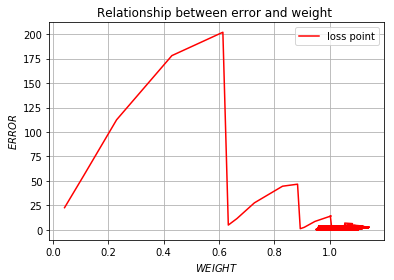

In [15]:
#plot to show the relationship between error and weight 
plt.plot(weight_list,loss_list,'r',label="loss point",markersize=15)
plt.title("Relationship between error and weight ")
plt.xlabel("$WEIGHT$")
plt.ylabel("$ERROR$")
plt.grid(True)
plt.legend()
plt.show()

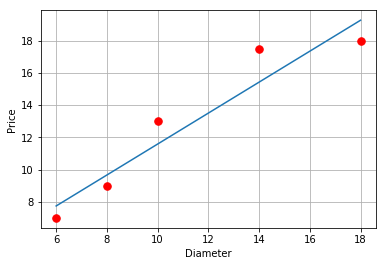

In [16]:
#plot the line that fits the model
y = w*diameter + b
plt.plot(diameter,price,'r.',markersize=15)
plt.plot(diameter,y)
plt.xlabel("Diameter")
plt.ylabel("Price")
plt.grid(True)
plt.show()

<h3>Evaluating the fitness of a model with a cost function</h3>

- A **cost function**, also called a **loss function**, is used to define and measure the error of a model. 
- The differences between the prices predicted by the model and observed prices of the pizza in the training set are called **residuals** or **training errors**
- The difference between the predicted and observed values in the test data are called **prediction errors** or **test errors**

- The best pizza-price predictor can be produced by minimizing the sum of residuals.
- That is, our model fits if the values it predicts for the response variable are close to the observed values for all of the training examples.
- This measure of the model's fitness is called the **residual sum of squares** cost function.
- The residual sum of squares is calculated with the formula in the equation below :-

<br>
<h3 style="text-align:center;">ss<sub>res</sub> = &sum;(<i>y<sub>i</sub></i> - <i>f(<i>x<sub>i</sub><i/>))<sup>2</sup></i>  from  <i>i</i>=1...n</h3>
    
<br>

- Where <i>y<sub>i</sub></i>, is the observed value and <i>f(<i>x<sub>i</sub><i/>) is the predicted value.  
    
<br>

In [17]:
#Measuring accuracy # Use r-squared 
# in case of linear regression r-square is the product of the Pearson
# product moment correlation coefficient or Pearson's r
#find the sum of residual 

In [18]:
# find the sum of true_test - observed mean value
sum_observed_test = 0 
price_pred_test = np.array([11,8.5,15,18,11])
price_test = np.array([8,9,11,16,12])
price_mean_test = price_pred_test.mean()
for _y in price_pred_test:
    sum_observed_test += (_y - price_mean_test)**2 
    
print("Sum of test difference : ",sum_observed_test)    

Sum of test difference :  56.8


In [19]:
# also find the sum of residuals 
# given as true_test - measured(predicted)
sum_true_train = 0
y_test = np.array([11,8.5,15,18,11])
price_pred_test = predict(np.array([8,9,11,16,12]))
for y_ ,y_pred in zip(y_test,price_pred_test):   
    sum_true_train += (y_ - y_pred)**2
print("Sum of train difference : ",sum_true_train)    

Sum of train difference :  19.027731732792724


In [20]:
# Then the accuracy of the model 

r_square = 1-(sum_true_train/sum_observed_test)

print("The model accuracy is : ",r_square)

The model accuracy is :  0.6650047230142127


<h3>Using SciKit Learn library</h3>

In [21]:
#import LinearRegression from scikit learn
from sklearn.linear_model import LinearRegression
#The training data set
diameter = np.array([[6],[8],[10],[14],[18]])
price = np.array([[7],[9],[13],[17.5],[18]])
#Create and fit the model// fit means finding/calculating the optimal values 
# from the provided training set
#create model
model = LinearRegression()
#fit the model
model.fit(diameter,price)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [22]:
#optimal values obtained from the model
print("The optimal value of weight : ",model.coef_)
#optimal value of bias
print("The optimal value of bias is : ",model.intercept_)

The optimal value of weight :  [[0.9762931]]
The optimal value of bias is :  [1.96551724]


In [23]:
#then the prediction of the nodel after training
print("[8,9,11,16,12] diameter pizza costs : ",predict(np.array([8,9,11,16,12]))," dollars")

[8,9,11,16,12] diameter pizza costs :  [ 9.662041   10.62218295 12.54246684 17.34317657 13.50260878]  dollars


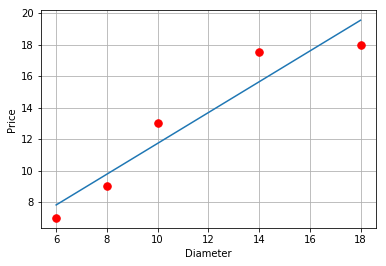

In [24]:
#plot the line that fits the model
y = model.coef_*diameter + model.intercept_
plt.plot(diameter,price,'r.',markersize=15)
plt.plot(diameter,y)
plt.xlabel("Diameter")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [25]:
#check the model accuracy
#test set
X = np.array([[8],[9],[11],[16],[12]])
y = np.array([[11],[8.5],[15],[18],[11]])
print("The model accuracy is : ",model.score(X,y))

The model accuracy is :  0.6620052929422553


<h3 style="text-align:center;"><u>MULTIPLE LINEAR REGRESSION</u></h3>

<br>

- In Multiple linear regression we can use a generalization of simple linear regression that can use multiple explanatory variables called **multiple linear regression**
- Formally, multiple linear regression is the following model:

<br>

<h3 style="text-align:center"><i>y</i> = &alpha; + &beta;<sub>1</sub><i>x<sub>1</sub></i> + &beta;<sub>2</sub><i>x<sub>2</sub></i> + &beta;<sub>3</sub><i>x<sub>3</sub></i>...&beta;<sub>n</sub><i>x<sub>n</sub></i> </h3>

<br>

- Where simple linear regression uses a single explanatory variable with a single coefficient, multiple linear regression uses a coefficient for each of an arbitrary number of explanatory variables.

<br>
 <h3 style="text-align:center;">Y = X&beta;</h3>
 
 - Where Y, X and <span>&beta;</span> are matrices for the targets,attributes and parameters. 
 - Let's update our pizza training data to include the number of topping with the following values.

**Dataset**
<br>
<h6>Train set</h6>
<br>

**Training instance** | **Diameter (in inches)**  | **Number of toppings**| **Price(in dillars)**   
-------------------------|-----------------------------|-------------------|-----------------
1.                       |            6                |       2           |      7           
2.                       |            8                |       1           |      9
3.                       |            10               |       0           |      13
4.                       |            14               |       2           |      17.5
5.                       |            18               |       0           |      18

<br>
<h6>Test set </h6>
<br>


**Training instance** | **Diameter (in inches)**  | **Number of topping*s*| **Price(in dillars)**   
-------------------------|-----------------------------|-------------------|-----------------
1.                       |            8                |       2           |     11           
2.                       |            9                |       0           |     8.5 
3.                       |            11               |       2           |     15
4.                       |            16               |       2           |     18
5.                       |            12               |       0           |     11



<br>


- Our learning algorithm must estamate the values of three parameters: the coefficients for the two features and the intercept term .

<br>

<h3>Normal Equation</h3>

- While one might be tempted to solve <span>&beta;</span> by dividing each side of the equation by X, division by matrix is impossible.
- Instead we can multiply <span>&beta;</span> by inverse of X to avoid matrix division.
- Matrix inversion is denoted with a superscript -1.
- Only square matrices can be inverted. X is not likely to be square, we can multiply X by its transpose to yield a square matrix that can be inverted
- To recap, our model is given by the following formula:

<br>

 <h3 style="text-align:center;">Y = X&beta;</h3>
  <br>
  
- We know the values of Y and X from our training data. We must find the values of  <span>&beta;</span>, which minimize the cost function.
- We can solve <span>&beta;</span> as follows:-

<br>

<h3 style="text-align:center;"><span>&beta;</span> = (X<sup>T</sup>X)<sup>-1</sup> X<sup>T</sup>Y</h3>

<br>

- The above equation is called **Normal equation**.

- We can solve <span>&beta;</span> using NumPy as follows:-
    
  <h3>Implementation concept</h3>  

In [26]:
from numpy.linalg import inv
from numpy import dot,transpose

In [27]:
diameter = np.array([6,8,10,14,18])
price = np.array([7,9,13,17.5,18])
topping= np.array([2,1,0,2,0])

In [28]:
#initializze the parameters 
a =  0
b1 = 0
b2 = 0

In [29]:
#define a prediction function
def predict_multiple(x1,x2):
    return (a + b1*x1 + b2*x2)

In [30]:
#then the prediction of the nodel before training
print("[8,9,11,16,12] diameter pizza costs : ",
      predict_multiple(np.array([8,9,11,16,12]),np.array([2,1,0,2,0]))," dollars")

[8,9,11,16,12] diameter pizza costs :  [0 0 0 0 0]  dollars


In [31]:
#train the model // fit the model
X = np.array([[1,6,2],[1,8,1],[1,10,0],[1,14,2],[1,18,0]])
y = np.array([[7],[9],[13],[17.5],[18]])
beta = dot(inv(dot(transpose(X),X)),dot(transpose(X),y))

In [32]:
print("The optimal values of beta (the parameters are : ) \n",beta)

The optimal values of beta (the parameters are : ) 
 [[1.1875    ]
 [1.01041667]
 [0.39583333]]


In [33]:
#then optimal values
a = beta[0]
b1= beta[1]
b2 = beta[2]

In [34]:
#then the prediction of the nodel after training
print("[8,9,11,16,12] diameter pizza costs : ",
      predict_multiple(np.array([8,9,11,16,12]),np.array([2,1,0,2,0]))," dollars")

[8,9,11,16,12] diameter pizza costs :  [10.0625     10.67708333 12.30208333 18.14583333 13.3125    ]  dollars


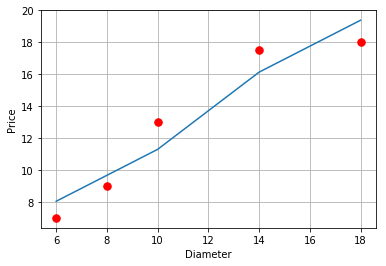

In [35]:
#plot the line that fits the data
y = a + b1*diameter + b2*topping
plt.plot(diameter,price,'r.',markersize=15)
plt.plot(diameter,y)
plt.xlabel("Diameter")
plt.ylabel("Price")
plt.grid(True)
plt.show()

<h5>Model accuracy</h5>

In [36]:
# find the sum of true_test - observed mean value
sum_observed_test = 0 
price_pred_test = np.array([11,8.5,15,18,11])
price_test = np.array([8,9,11,16,12])
price_mean_test = price_pred_test.mean()
for _y in price_pred_test:
    sum_observed_test += (_y - price_mean_test)**2 
    
print("Sum of test difference : ",sum_observed_test)    

Sum of test difference :  56.8


In [37]:
# also find the sum of residuals 
# given as true_test - measured(predicted)
sum_true_train = 0
y_test = np.array([11,8.5,15,18,11])
price_pred_test = predict_multiple(np.array([8,9,11,16,12]),np.array([2,1,0,2,0]))
for y_ ,y_pred in zip(y_test,price_pred_test):   
    sum_true_train += (y_ - y_pred)**2
print("Sum of train difference : ",sum_true_train)    

Sum of train difference :  18.266276041666664


In [38]:
# Then the accuracy of the model 

r_square = 1-(sum_true_train/sum_observed_test)

print("The model accuracy is : ",r_square)

The model accuracy is :  0.6784106330692489


<h3>Using SciKit Learn library</h3>

In [39]:
#import the model from sklearn
from sklearn.linear_model import LinearRegression
#prepare the data
X = [[6,2],[8,1],[10,0],[14,2],[18,0]]
y = [[7],[9],[13],[17.5],[18]]
#create a model 
m_model  = LinearRegression()
#fit the model
m_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

In [40]:
#test the model 
#prepare the test set
X_test = [[8,2], [9,0], [11,2], [16,2], [12,0]]
y_test = [[11],[8.5],[15],[18],[11]]

predictions = m_model.predict(X_test) 

In [41]:
predictions

array([[10.0625    ],
       [10.28125   ],
       [13.09375   ],
       [18.14583333],
       [13.3125    ]])

In [42]:
#then the prediction of the model after training
print("[8,9,11,16,12] diameter pizza costs : ",
      predict_multiple(np.array([8,9,11,16,12]),np.array([2,1,0,2,0]))," dollars")

[8,9,11,16,12] diameter pizza costs :  [10.0625     10.67708333 12.30208333 18.14583333 13.3125    ]  dollars


In [43]:
for i,prediction in enumerate(predictions):
    print("Predicted: %s, Target: %s" % (prediction,y_test[i]))

Predicted: [10.0625], Target: [11]
Predicted: [10.28125], Target: [8.5]
Predicted: [13.09375], Target: [15]
Predicted: [18.14583333], Target: [18]
Predicted: [13.3125], Target: [11]


In [44]:
#model parameters are :
print("Model intercept is : ",m_model.intercept_)
print("Model intercept gradient: ",m_model.coef_)

Model intercept is :  [1.1875]
Model intercept gradient:  [[1.01041667 0.39583333]]


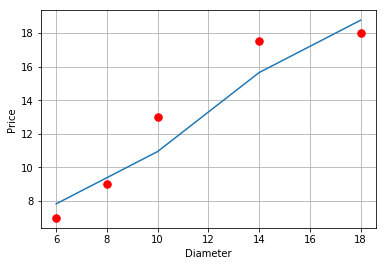

In [45]:
#plot the line that fits the model
y = m_model.intercept_ + model.coef_[0][0]*diameter + m_model.coef_[0][1]*topping
plt.plot(diameter,price,'r.',markersize=15)
plt.plot(diameter,y)
plt.xlabel("Diameter")
plt.ylabel("Price")
plt.grid(True)
plt.show()

In [46]:
#model accuracy 
print("The model accuracy is : ",m_model.score(X_test,y_test))

The model accuracy is :  0.7701677731318468


<h2 style="text-align:center"><u>POLYNOMIAL REGRESSION</u></h2>

<br>

- The assuption that there is a linear relationship between the explanatory variables and the response.
- This assumption is not always true, we will use **polynomial regression**,as a special case of multiple linear regression that adds terms with degrees greater than one to the model
- The real-world curvilinear relationship is captured when the training data are transformed by adding polynomial terms, which are then fit in the same manner as in multiple linear regression.
- For the case of visualization, we will again use only one explanatory variable, the pizza's diameter.
- Let's compare linear regression with ploynomial regression using the following datasets

**Dataset**
<br>
<h6>Train set</h6>
<br>

**Training instance**      |    **Diameter (in inches)** | **Price(in dillars)**
---------------------------|-------------------------------|----------------------------
1.                         |            6                  |           7
2.                         |            8                  |           9
3.                         |            10                 |           13
4.                         |            14                 |           17.5
5.                         |            18                 |           18

<br>
<h6>Test set </h6>
<br>

**Training instance**      |    **Diameter (in inches)** | **Price(in dillars)**
---------------------------|-------------------------------|----------------------------
1.                         |            8                  |           7
2.                         |            9                  |           9
3.                         |            11                 |           13
4.                         |            16                 |           17.5

<br>



**Quadratic regression** , or regression with a second order polynomial is given by the following formula:- 

<br>

<h3 style="text-align:center"><i>y</i> = &alpha; + &beta;<sub>1</sub><i>x</i> + &beta;<sub>2</sub><i>x<sup>2</sup></i></h3>

<br>
<h3>Implementation Concept</h3>


In [47]:
diameters_poly = np.array([6,8,10,14,18])
price_poly = np.array([7,9,13,17.5,18])
diameter_squares = np.square(diameters_poly) 

In [48]:
# initialize the parameters to zero
a_poly = 0
b_poly = 0
c_poly = 0

In [49]:
#define a predictor for polynomial regression

def predict_polynomial(x,x2):
    return (a_poly + b_poly*x + c_poly*x2)

In [50]:
#then the prediction of the nodel before training
print("[8,9,11,16,12] diameter pizza costs : ",
      predict_polynomial(np.array([6,8,10,14]),np.square(np.array([6,8,10,14])))," dollars")

[8,9,11,16,12] diameter pizza costs :  [0 0 0 0]  dollars


In [51]:
#train the model // fit the model
X = np.array([[1,6,36],[1,8,64],[1,10,100],[1,14,196],[1,18,324]])
y = np.array([[7],[9],[13],[17.5],[18]])
parameters = dot(inv(dot(transpose(X),X)),dot(transpose(X),y))

In [52]:
print("The optimal values of beta (the parameters are : ) \n",parameters)

The optimal values of beta (the parameters are : ) 
 [[-8.39765458]
 [ 2.95615672]
 [-0.08202292]]


In [53]:
a_poly = parameters[0]
b_poly = parameters[1]
c_poly = parameters[2]

In [54]:
#then the prediction of the model before training
print("[8,9,11,16,12] diameter pizza costs : ",
      predict_polynomial(np.array([6,8,10,14]),np.square(np.array([6,8,10,14])))," dollars")

[8,9,11,16,12] diameter pizza costs :  [ 6.38646055 10.0021322  12.96162047 16.91204691]  dollars


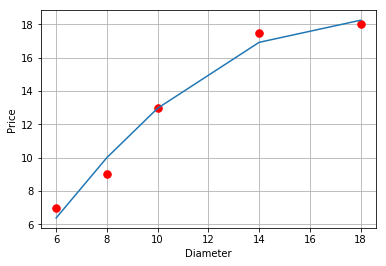

In [55]:
#plot the line that fits the model
y = a_poly + b_poly*diameter + c_poly*diameter_squares
plt.plot(diameter,price,'r.',markersize=15)
plt.plot(diameter,y)
plt.xlabel("Diameter")
plt.ylabel("Price")
plt.grid(True)
plt.show()

<h5>Model accuracy</h5>

In [56]:
# find the sum of true_test - observed mean value
sum_observed_test = 0 
price_pred_test = np.array([7,9.13,17.5])
price_test = np.array([6,8,10,14])#diameters
price_mean_test = price_pred_test.mean()
for _y in price_pred_test:
    sum_observed_test += (_y - price_mean_test)**2 
    
print("Sum of test difference : ",sum_observed_test)    

Sum of test difference :  61.614599999999996


In [57]:
# also find the sum of residuals 
# given as true_test - measured(predicted)
sum_true_train = 0
y_test = np.array([7,9,13,17.5])
price_pred_test = predict_polynomial(np.array([6,8,10,14]),np.square(np.array([6,8,10,14])))
for y_ ,y_pred in zip(y_test,price_pred_test):   
    sum_true_train += (y_ - y_pred)**2
print("Sum of train difference : ",sum_true_train)    

Sum of train difference :  1.727861416341771


In [58]:
# Then the accuracy of the model 

r_square = 1-(sum_true_train/sum_observed_test)

print("The model accuracy is : ",r_square)

The model accuracy is :  0.9719569482502236


<h3>Using SciKit Learn library</h3>

In [59]:
#import libraries
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures

In [60]:
#prepare the dataset 
X_train_poly = np.array([[6],[8],[10],[14],[18]])
y_train_poly = np.array([[7],[9],[13],[17.5],[18]])
X_test_poly = np.array([[6],[8],[11],[16]])
y_test_poly = np.array([[8],[12],[15],[18]])

In [61]:
# try a simple linear regression
regressor = LinearRegression()
regressor.fit(X_train_poly,y_train_poly)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None,
         normalize=False)

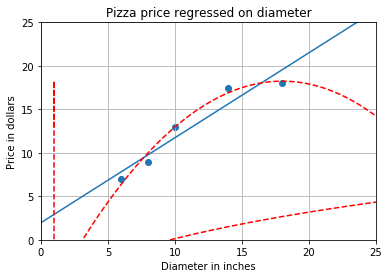

In [62]:
xx = np.linspace(0,26,100)
yy = regressor.predict(xx.reshape(-1,1))
plt.plot(xx,yy)

# create the quadratic features
quadratic_featurizer = PolynomialFeatures(degree=2)
X_train_quad = quadratic_featurizer.fit_transform(X_train_poly)
X_test_quad = quadratic_featurizer.fit_transform(X_test_poly)


regressor_quadradic = LinearRegression()
regressor_quadradic.fit(X_train_quad,y_train_poly)

xx_quad =  quadratic_featurizer.fit_transform(xx.reshape(-1,1))
plt.plot(xx_quad,regressor_quadradic.predict(xx_quad),c='r',linestyle="--")
plt.title("Pizza price regressed on diameter")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in dollars")
plt.axis([0,25,0,25])
plt.grid(True)
plt.scatter(X_train_poly,y_train_poly)
plt.show()

In [63]:
print("Simple linear regression r-sqaured : ", regressor.score(X_test_poly,y_test_poly))
print("Quadratic regression r-squared : ", 
      regressor_quadradic.score(X_test_quad,y_test_poly))

Simple linear regression r-sqaured :  0.809726797707665
Quadratic regression r-squared :  0.8675443656345054


- The r-squared score of the simple linear regression model is 0.81; 
- The quadratic regression model's r-squared score is an improvement at 0.87.
- While quadratic and cubic regression models are the most common, we can add polynomial of any degree 
- Let's try an evn higher-order polynomial, take **ninth-degree ploynomial**

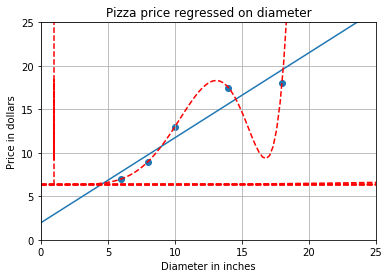

In [64]:
xx = np.linspace(0,26,100)
yy = regressor.predict(xx.reshape(-1,1))
plt.plot(xx,yy)
#xx.shape[0] = -1
# create the quadratic features
ninth_featurizer = PolynomialFeatures(degree=9)
X_train_ninth = ninth_featurizer.fit_transform(X_train_poly)
X_test_ninth= ninth_featurizer.fit_transform(X_test_poly)


regressor_ninth = LinearRegression()
regressor_ninth.fit(X_train_ninth,y_train_poly)

xx_ninth =  ninth_featurizer.fit_transform(xx.reshape(-1,1))
plt.plot(xx_ninth,regressor_ninth.predict(xx_ninth),c='r',linestyle="--")
plt.title("Pizza price regressed on diameter")
plt.xlabel("Diameter in inches")
plt.ylabel("Price in dollars")
plt.axis([0,25,0,25])
plt.grid(True)
plt.scatter(X_train_poly,y_train_poly)
plt.show()

In [65]:
print("Ninth regression r-squared : ", 
      regressor_ninth.score(X_test_ninth,y_test_poly))

Ninth regression r-squared :  -0.09435666704314193


- The **ninth-degree** polynomial regression model fits the training data almost exactly.
- The model's r-squared score, however, is -0.09, we created an extremely complex model that fits the training data exactly, but fails to approximate the real relationship.
- This problem is called **Overfitting**.
- The model should induce a general rule to map inputs to outputs; instead, it has memorized the inputs and outputs from the training data.
- As a result, the model performs poorly on test data.
- It predicts that a 16 inch pizza should cost less than 10 dollar, and an 18 should cost more than 30 dollar.
- This model exactly fits the training data, but fails to learn the real relationship between size and price
- This problem can be prevented by the collection of techniques called **Regularization**

 <h4 style="text-align:center;"> @ Telesoft & CIVE-AI</h4> <br><h5 style="text-align:center;">  Zephania Reuben</h5>